In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
datasets = [train, test]

In [7]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## data preprocessing

In [8]:
for df in datasets:
    print(df.duplicated().sum()) # no duplicated raws in train or test

0
0


In [9]:
train.shape

(1460, 81)

In [10]:
# from data description NA values is meaningfull
for df in datasets:
    df['Alley'].fillna('No_alley_access',inplace=True)
    df['BsmtFinType2'].fillna('No_Basement',inplace=True)
    df['BsmtFinType1'].fillna('No_Basement',inplace=True)    
    df['BsmtExposure'].fillna('No_Basement',inplace=True)    
    df['BsmtCond'].fillna('No_Basement',inplace=True)    
    df['BsmtQual'].fillna('No_Basement',inplace=True) 
    df['FireplaceQu'].fillna('No_Fireplace',inplace=True)
    df['GarageCond'].fillna('No_Garage',inplace=True)
    df['GarageQual'].fillna('No_Garage',inplace=True)    
    df['GarageFinish'].fillna('No_Garage',inplace=True)    
    df['GarageType'].fillna('No_Garage',inplace=True)    
    df['PoolQC'].fillna('No_Pool',inplace=True)    
    df['Fence'].fillna('No_Fence',inplace=True)     

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,NaN,0,12,2008,WD,Normal,250000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
for df in datasets:
    df.drop('MiscFeature',axis=1,inplace=True)

In [14]:
for df in datasets:
    dtypes =  df.dtypes.to_dict()
    for col in df.columns:
        if dtypes[col] == 'O':
            print(f"{col} : {df[col].unique()} ")
    print('='*30)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
Street : ['Pave' 'Grvl'] 
Alley : ['No_alley_access' 'Grvl' 'Pave'] 
LotShape : ['Reg' 'IR1' 'IR2' 'IR3'] 
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS'] 
Utilities : ['AllPub' 'NoSeWa'] 
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 
LandSlope : ['Gtl' 'Mod' 'Sev'] 
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Ta

In [15]:
null_index =  list(train[train['MasVnrType'].isnull()].index)
null_index

[234, 529, 650, 936, 973, 977, 1243, 1278]

In [16]:
train.drop(index=null_index,axis=0,inplace=True)

In [17]:
null_index =  list(train[train['Electrical'].isnull()].index)
null_index

[1379]

In [18]:
train.drop(index=null_index,axis=0,inplace=True)

In [19]:
'''
i will concat train and test dataFrames to make sure that columns will be identical after encoding
and to fillna in numerical columns with mean in the entire data
'''
target = 'SalePrice' # dtype = int64
target_values = train[target]
train.drop(columns=[target], inplace=True)
train[target] = target_values
train[target] = train[target].astype(str)
test[target] = np.repeat("test_dataset", test.shape[0])
df = pd.concat([train, test])

In [20]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,0,6,2006,WD,Normal,test_dataset
1455,2916,160,RM,21.0,1894,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,0,4,2006,WD,Abnorml,test_dataset
1456,2917,20,RL,160.0,20000,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,0,9,2006,WD,Abnorml,test_dataset
1457,2918,85,RL,62.0,10441,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,MnPrv,700,7,2006,WD,Normal,test_dataset
1458,2919,60,RL,74.0,9627,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,0,11,2006,WD,Normal,test_dataset


In [21]:
null_df = df.isnull().mean().to_frame()
null_df["column"] = null_df.index
null_df.index = np.arange(null_df.shape[0])
null_df[null_df[0] >0.001]

,0,column
2,0.001375,MSZoning
3,0.166323,LotFrontage
25,0.005498,MasVnrType
26,0.005155,MasVnrArea
59,0.054639,GarageYrBlt


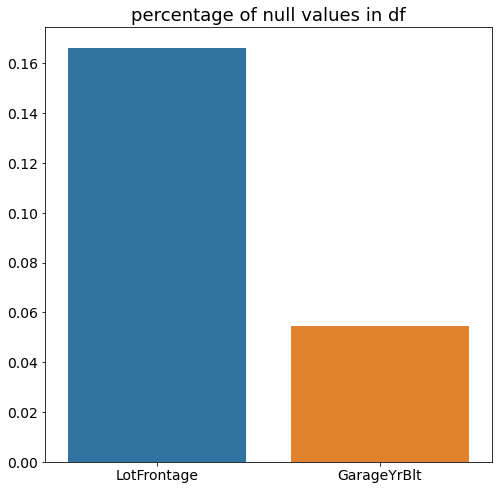

In [22]:
null_df['null_perc'] = null_df.iloc[:,0]
null_df = null_df.iloc[:,1:]
x = list(null_df[null_df.null_perc > 0.01]['column'])
y = list(null_df[null_df.null_perc > 0.01]['null_perc'])
plt.figure(figsize=(8,8))
sns.barplot(x=x,y=y);
plt.title('percentage of null values in df',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### fill null values in LotFrontage & GarageYrBlt columns

In [23]:
df.groupby('Street')['LotFrontage'].mean()

Street
Grvl    88.200000
Pave    69.214404
Name: LotFrontage, dtype: float64

In [24]:
df.loc[(df["LotFrontage"].isnull()) & (df["Street"]=='Grvl'), 'LotFrontage'] = 88.2
df.loc[(df["LotFrontage"].isnull()) & (df["Street"]=='Pave'), 'LotFrontage'] = 69.2144

In [25]:
df[(df.GarageYrBlt.isnull()) & (df['GarageType'] != 'No_Garage')]['GarageType']

666     Detchd
1116    Detchd
Name: GarageType, dtype: object

In [26]:
df.groupby('GarageType')['GarageYrBlt'].mean()

GarageType
2Types       1964.695652
Attchd       1984.279720
Basment      1963.138889
BuiltIn      1997.054348
CarPort      1958.066667
Detchd       1961.213642
No_Garage            NaN
Name: GarageYrBlt, dtype: float64

In [27]:
# detchd garage type built in 1961, should check if the house built before 1961 or not!
df[(df.GarageYrBlt.isnull()) & (df['GarageType'] != 'No_Garage')]['YearBuilt']

666     1910
1116    1923
Name: YearBuilt, dtype: int64

In [28]:
# now we can assume null values in detchd garage built in 1961 
df.loc[(df["GarageYrBlt"].isnull()) & (df["GarageType"]=='Detchd'), 'GarageYrBlt'] = 1961
df.loc[(df["GarageYrBlt"].isnull()) & (df["GarageType"]=='No_Garage'), 'GarageYrBlt'] = 0

In [29]:
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

## classify columns numerical and categorical

In [30]:
numercal_columns = []
categorical_columns = []
dtypes =  df.dtypes.to_dict()
for col in df.columns:
    if dtypes[col] == 'O':
        categorical_columns.append(col)
    else:
        numercal_columns.append(col)

In [31]:
categorical_columns.remove(target) # we don't need to make changes to target column

In [32]:
for column in numercal_columns:
    df[column].fillna(value=df[column].mean(), inplace=True)

In [33]:
get_dummies_cols = [] # columns have 3 to 7 unique values will be encoded using pd.get_dummies
encoder_cols = [] # else will be encoded by labelencoder
for col in categorical_columns:
    if 3 <= df[col].nunique() <= 7:
        get_dummies_cols.append(col)
    else:
        encoder_cols.append(col)

In [34]:
df[categorical_columns] = df[categorical_columns].fillna("unknown")

In [35]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for col in encoder_cols:
    df[col] = encoder.fit_transform(
        df[col]
    )
for col in get_dummies_cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df = df.drop([col], axis=1)

In [36]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,Neighborhood,Condition1,Condition2,HouseStyle,...,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,10,65.0,8450,1,0,5,2,2,5,...,0,1,0,0,0,0,0,0,1,0
1,2,5,80.0,9600,1,0,24,1,2,2,...,1,0,0,0,0,0,0,0,1,0
2,3,10,68.0,11250,1,0,5,2,2,5,...,0,1,0,0,0,0,0,0,1,0
3,4,11,60.0,9550,1,0,6,2,2,5,...,0,0,0,0,1,0,0,0,0,0
4,5,10,84.0,14260,1,0,15,2,2,5,...,0,1,0,0,0,0,0,0,1,0


## split train and test

In [37]:
train_n = df[df[target] != "test_dataset"]
test_n = df[df[target] == "test_dataset"].drop(target, axis=1)
train_n[target] = train_n[target].astype(int)

In [38]:
train_n.shape

(1451, 214)

In [39]:
x_train = train_n.drop(['Id',target],axis=1)
y_train = train_n[target]
x_test = test_n.drop(['Id'],axis=1)

In [43]:
from sklearn.linear_model import ElasticNet,Lasso,BayesianRidge,SGDRegressor,LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import xgboost as xgb

In [45]:
from xgboost.sklearn import XGBRegressor

In [46]:
estimators = {
    "EN":ElasticNet(),
    "lasso":Lasso(),
    "BR":BayesianRidge(),
    "SGD":SGDRegressor(),
    "LR":LinearRegression(),
    "RF":RandomForestRegressor(),
    "GB":GradientBoostingRegressor(),
    "KR":KernelRidge(),
    "SVR":SVR(),
    "catboost":CatBoostRegressor(),
    "xgb":XGBRegressor()
}

## find best regressor

In [47]:
from sklearn.model_selection import cross_validate
results = pd.DataFrame(columns=["Regressor", "Avg_r2"])
for name, reg in estimators.items():
    model = reg
    cv_results = cross_validate(
        model, x_train , y_train , cv=10,
        scoring=['r2']
    )
    results = results.append({
        "Regressor": name,
        "Avg_r2": cv_results['test_r2'].mean(),
    }, ignore_index=True)

results = results.sort_values("Avg_r2", ascending=False)
results

Learning rate set to 0.042702
0:	learn: 78290.2513050	total: 159ms	remaining: 2m 39s
1:	learn: 76013.3711354	total: 175ms	remaining: 1m 27s
2:	learn: 73932.6072719	total: 187ms	remaining: 1m 2s
3:	learn: 71951.4988323	total: 202ms	remaining: 50.3s
4:	learn: 69959.3805918	total: 224ms	remaining: 44.6s
5:	learn: 68260.4428973	total: 237ms	remaining: 39.3s
6:	learn: 66620.9208218	total: 248ms	remaining: 35.2s
7:	learn: 65016.4103996	total: 259ms	remaining: 32.1s
8:	learn: 63330.7635829	total: 270ms	remaining: 29.7s
9:	learn: 61828.1175785	total: 281ms	remaining: 27.8s
10:	learn: 60527.0591636	total: 292ms	remaining: 26.2s
11:	learn: 59263.7766633	total: 302ms	remaining: 24.9s
12:	learn: 57922.1403067	total: 313ms	remaining: 23.8s
13:	learn: 56626.0494276	total: 324ms	remaining: 22.8s
14:	learn: 55395.2926958	total: 335ms	remaining: 22s
15:	learn: 54405.3310177	total: 346ms	remaining: 21.3s
16:	learn: 53265.2099002	total: 357ms	remaining: 20.6s
17:	learn: 52172.6896509	total: 367ms	remaini

154:	learn: 18584.8985884	total: 2.05s	remaining: 11.2s
155:	learn: 18529.3105975	total: 2.1s	remaining: 11.3s
156:	learn: 18445.7207171	total: 2.12s	remaining: 11.4s
157:	learn: 18395.5848570	total: 2.13s	remaining: 11.4s
158:	learn: 18369.5395090	total: 2.14s	remaining: 11.3s
159:	learn: 18306.0472277	total: 2.15s	remaining: 11.3s
160:	learn: 18264.6409067	total: 2.17s	remaining: 11.3s
161:	learn: 18226.4035011	total: 2.18s	remaining: 11.3s
162:	learn: 18197.6862091	total: 2.19s	remaining: 11.2s
163:	learn: 18132.4549943	total: 2.2s	remaining: 11.2s
164:	learn: 18106.7786472	total: 2.21s	remaining: 11.2s
165:	learn: 18072.4062010	total: 2.22s	remaining: 11.2s
166:	learn: 18017.3887606	total: 2.23s	remaining: 11.1s
167:	learn: 17972.5825506	total: 2.25s	remaining: 11.1s
168:	learn: 17947.0514727	total: 2.26s	remaining: 11.1s
169:	learn: 17907.7533491	total: 2.27s	remaining: 11.1s
170:	learn: 17848.0309128	total: 2.29s	remaining: 11.1s
171:	learn: 17794.5184446	total: 2.3s	remaining: 1

318:	learn: 13320.4425139	total: 3.96s	remaining: 8.46s
319:	learn: 13306.8249732	total: 3.98s	remaining: 8.45s
320:	learn: 13278.0088324	total: 3.99s	remaining: 8.45s
321:	learn: 13255.5948908	total: 4s	remaining: 8.43s
322:	learn: 13233.5710428	total: 4.02s	remaining: 8.42s
323:	learn: 13198.6044334	total: 4.03s	remaining: 8.4s
324:	learn: 13190.5937927	total: 4.04s	remaining: 8.39s
325:	learn: 13179.4833372	total: 4.05s	remaining: 8.37s
326:	learn: 13165.8051688	total: 4.06s	remaining: 8.36s
327:	learn: 13156.7224868	total: 4.07s	remaining: 8.34s
328:	learn: 13133.4569294	total: 4.08s	remaining: 8.33s
329:	learn: 13106.4613940	total: 4.09s	remaining: 8.31s
330:	learn: 13081.4308061	total: 4.1s	remaining: 8.29s
331:	learn: 13059.1256367	total: 4.11s	remaining: 8.28s
332:	learn: 13035.0218016	total: 4.13s	remaining: 8.26s
333:	learn: 13003.2758401	total: 4.14s	remaining: 8.25s
334:	learn: 12974.1178936	total: 4.15s	remaining: 8.23s
335:	learn: 12940.2375230	total: 4.16s	remaining: 8.2

468:	learn: 10615.3072704	total: 5.68s	remaining: 6.43s
469:	learn: 10597.9383547	total: 5.69s	remaining: 6.42s
470:	learn: 10581.3019141	total: 5.71s	remaining: 6.41s
471:	learn: 10559.7461199	total: 5.72s	remaining: 6.39s
472:	learn: 10556.5156925	total: 5.73s	remaining: 6.38s
473:	learn: 10543.4472566	total: 5.74s	remaining: 6.37s
474:	learn: 10525.2659562	total: 5.75s	remaining: 6.35s
475:	learn: 10520.3960531	total: 5.76s	remaining: 6.34s
476:	learn: 10510.7328278	total: 5.77s	remaining: 6.33s
477:	learn: 10494.9932017	total: 5.78s	remaining: 6.31s
478:	learn: 10484.1410728	total: 5.79s	remaining: 6.3s
479:	learn: 10468.7525465	total: 5.8s	remaining: 6.28s
480:	learn: 10458.7156713	total: 5.81s	remaining: 6.27s
481:	learn: 10439.4459947	total: 5.82s	remaining: 6.26s
482:	learn: 10425.6558963	total: 5.83s	remaining: 6.25s
483:	learn: 10411.7615186	total: 5.84s	remaining: 6.23s
484:	learn: 10398.2943925	total: 5.86s	remaining: 6.22s
485:	learn: 10380.9164834	total: 5.87s	remaining: 

633:	learn: 8508.6213251	total: 7.59s	remaining: 4.38s
634:	learn: 8496.0436740	total: 7.61s	remaining: 4.37s
635:	learn: 8486.9016855	total: 7.62s	remaining: 4.36s
636:	learn: 8473.8903215	total: 7.63s	remaining: 4.35s
637:	learn: 8472.5994586	total: 7.64s	remaining: 4.34s
638:	learn: 8469.0974859	total: 7.65s	remaining: 4.32s
639:	learn: 8452.3856822	total: 7.66s	remaining: 4.31s
640:	learn: 8440.2904504	total: 7.67s	remaining: 4.3s
641:	learn: 8430.5459695	total: 7.68s	remaining: 4.29s
642:	learn: 8420.6428276	total: 7.7s	remaining: 4.27s
643:	learn: 8410.8351882	total: 7.71s	remaining: 4.26s
644:	learn: 8402.2846884	total: 7.72s	remaining: 4.25s
645:	learn: 8386.9427826	total: 7.73s	remaining: 4.23s
646:	learn: 8377.4934298	total: 7.74s	remaining: 4.22s
647:	learn: 8371.3319264	total: 7.75s	remaining: 4.21s
648:	learn: 8360.1925069	total: 7.76s	remaining: 4.2s
649:	learn: 8341.2620068	total: 7.77s	remaining: 4.18s
650:	learn: 8330.0759908	total: 7.78s	remaining: 4.17s
651:	learn: 8

794:	learn: 7080.4167985	total: 9.48s	remaining: 2.44s
795:	learn: 7072.4037265	total: 9.49s	remaining: 2.43s
796:	learn: 7064.7208662	total: 9.51s	remaining: 2.42s
797:	learn: 7055.0891866	total: 9.52s	remaining: 2.41s
798:	learn: 7047.7926791	total: 9.53s	remaining: 2.4s
799:	learn: 7033.5069815	total: 9.54s	remaining: 2.39s
800:	learn: 7022.2245980	total: 9.56s	remaining: 2.37s
801:	learn: 7021.5517891	total: 9.57s	remaining: 2.36s
802:	learn: 7012.0651795	total: 9.58s	remaining: 2.35s
803:	learn: 7010.5367886	total: 9.59s	remaining: 2.34s
804:	learn: 7009.7770717	total: 9.6s	remaining: 2.33s
805:	learn: 7003.0946147	total: 9.61s	remaining: 2.31s
806:	learn: 7002.5152509	total: 9.62s	remaining: 2.3s
807:	learn: 6993.0161390	total: 9.64s	remaining: 2.29s
808:	learn: 6992.2197563	total: 9.65s	remaining: 2.28s
809:	learn: 6982.4848666	total: 9.66s	remaining: 2.27s
810:	learn: 6978.1474843	total: 9.67s	remaining: 2.25s
811:	learn: 6966.9009890	total: 9.68s	remaining: 2.24s
812:	learn: 6

949:	learn: 6121.7713781	total: 11.6s	remaining: 612ms
950:	learn: 6113.1740559	total: 11.6s	remaining: 599ms
951:	learn: 6108.6180223	total: 11.6s	remaining: 587ms
952:	learn: 6099.9488816	total: 11.7s	remaining: 575ms
953:	learn: 6093.3158174	total: 11.7s	remaining: 563ms
954:	learn: 6092.8762919	total: 11.7s	remaining: 551ms
955:	learn: 6087.3837934	total: 11.7s	remaining: 538ms
956:	learn: 6072.1555502	total: 11.7s	remaining: 526ms
957:	learn: 6062.4336753	total: 11.7s	remaining: 514ms
958:	learn: 6056.8670376	total: 11.7s	remaining: 501ms
959:	learn: 6054.9225000	total: 11.7s	remaining: 489ms
960:	learn: 6047.4397355	total: 11.8s	remaining: 477ms
961:	learn: 6043.6975685	total: 11.8s	remaining: 465ms
962:	learn: 6039.0318677	total: 11.8s	remaining: 452ms
963:	learn: 6030.9993131	total: 11.8s	remaining: 440ms
964:	learn: 6023.2209796	total: 11.8s	remaining: 428ms
965:	learn: 6012.4593271	total: 11.8s	remaining: 416ms
966:	learn: 6003.9833471	total: 11.8s	remaining: 404ms
967:	learn

112:	learn: 20906.1238621	total: 1.28s	remaining: 10.1s
113:	learn: 20880.5368122	total: 1.3s	remaining: 10.1s
114:	learn: 20818.6921248	total: 1.31s	remaining: 10.1s
115:	learn: 20729.4957939	total: 1.32s	remaining: 10.1s
116:	learn: 20683.5956914	total: 1.33s	remaining: 10.1s
117:	learn: 20575.1898730	total: 1.35s	remaining: 10.1s
118:	learn: 20499.8234244	total: 1.36s	remaining: 10.1s
119:	learn: 20425.5863911	total: 1.37s	remaining: 10s
120:	learn: 20364.0956180	total: 1.38s	remaining: 10s
121:	learn: 20309.9263389	total: 1.39s	remaining: 10s
122:	learn: 20251.2449558	total: 1.4s	remaining: 10s
123:	learn: 20176.2651865	total: 1.42s	remaining: 10s
124:	learn: 20103.5871457	total: 1.43s	remaining: 10s
125:	learn: 20069.7524871	total: 1.44s	remaining: 10s
126:	learn: 19987.3753854	total: 1.46s	remaining: 10s
127:	learn: 19897.0881179	total: 1.47s	remaining: 10s
128:	learn: 19799.0412351	total: 1.48s	remaining: 10s
129:	learn: 19738.3645180	total: 1.5s	remaining: 10s
130:	learn: 19682

263:	learn: 14851.8562483	total: 3.18s	remaining: 8.87s
264:	learn: 14824.7582168	total: 3.2s	remaining: 8.87s
265:	learn: 14788.0436969	total: 3.21s	remaining: 8.86s
266:	learn: 14777.0707412	total: 3.23s	remaining: 8.85s
267:	learn: 14755.5313021	total: 3.24s	remaining: 8.84s
268:	learn: 14743.1734513	total: 3.25s	remaining: 8.84s
269:	learn: 14714.0412304	total: 3.27s	remaining: 8.83s
270:	learn: 14678.4624730	total: 3.28s	remaining: 8.84s
271:	learn: 14653.5442888	total: 3.3s	remaining: 8.83s
272:	learn: 14620.7238449	total: 3.31s	remaining: 8.83s
273:	learn: 14596.5928727	total: 3.33s	remaining: 8.82s
274:	learn: 14559.0960195	total: 3.35s	remaining: 8.82s
275:	learn: 14549.0680743	total: 3.36s	remaining: 8.82s
276:	learn: 14510.0057754	total: 3.38s	remaining: 8.81s
277:	learn: 14484.6627680	total: 3.4s	remaining: 8.82s
278:	learn: 14447.9673498	total: 3.41s	remaining: 8.81s
279:	learn: 14425.3984401	total: 3.42s	remaining: 8.8s
280:	learn: 14396.5200924	total: 3.44s	remaining: 8.

419:	learn: 11610.0467195	total: 5.31s	remaining: 7.33s
420:	learn: 11598.6791461	total: 5.33s	remaining: 7.33s
421:	learn: 11582.3810599	total: 5.34s	remaining: 7.32s
422:	learn: 11565.8406639	total: 5.36s	remaining: 7.31s
423:	learn: 11542.3796482	total: 5.37s	remaining: 7.29s
424:	learn: 11522.3498939	total: 5.38s	remaining: 7.28s
425:	learn: 11506.6675644	total: 5.39s	remaining: 7.26s
426:	learn: 11500.8869784	total: 5.4s	remaining: 7.25s
427:	learn: 11484.9472898	total: 5.42s	remaining: 7.24s
428:	learn: 11475.7798197	total: 5.43s	remaining: 7.22s
429:	learn: 11457.5002988	total: 5.44s	remaining: 7.21s
430:	learn: 11455.0402749	total: 5.45s	remaining: 7.2s
431:	learn: 11439.6360178	total: 5.46s	remaining: 7.18s
432:	learn: 11437.4996222	total: 5.47s	remaining: 7.17s
433:	learn: 11424.7666760	total: 5.49s	remaining: 7.16s
434:	learn: 11415.7829979	total: 5.5s	remaining: 7.14s
435:	learn: 11399.9480586	total: 5.51s	remaining: 7.13s
436:	learn: 11384.8535203	total: 5.53s	remaining: 7

576:	learn: 9456.5006775	total: 7.66s	remaining: 5.62s
577:	learn: 9438.0152342	total: 7.67s	remaining: 5.6s
578:	learn: 9414.0488759	total: 7.7s	remaining: 5.6s
579:	learn: 9404.4672842	total: 7.71s	remaining: 5.58s
580:	learn: 9386.2274241	total: 7.73s	remaining: 5.57s
581:	learn: 9372.7586723	total: 7.75s	remaining: 5.56s
582:	learn: 9361.8770727	total: 7.76s	remaining: 5.55s
583:	learn: 9354.0497804	total: 7.78s	remaining: 5.54s
584:	learn: 9343.7431085	total: 7.79s	remaining: 5.53s
585:	learn: 9330.5497911	total: 7.8s	remaining: 5.51s
586:	learn: 9319.6837700	total: 7.82s	remaining: 5.5s
587:	learn: 9297.9584950	total: 7.83s	remaining: 5.49s
588:	learn: 9295.5453243	total: 7.84s	remaining: 5.47s
589:	learn: 9294.5931924	total: 7.86s	remaining: 5.46s
590:	learn: 9277.7888358	total: 7.87s	remaining: 5.45s
591:	learn: 9263.6104951	total: 7.88s	remaining: 5.43s
592:	learn: 9243.6406494	total: 7.9s	remaining: 5.42s
593:	learn: 9232.9354049	total: 7.91s	remaining: 5.41s
594:	learn: 9222

734:	learn: 7895.2633037	total: 9.96s	remaining: 3.59s
735:	learn: 7886.6886911	total: 9.98s	remaining: 3.58s
736:	learn: 7885.6858100	total: 9.99s	remaining: 3.56s
737:	learn: 7876.9879963	total: 10s	remaining: 3.55s
738:	learn: 7873.3030064	total: 10s	remaining: 3.54s
739:	learn: 7872.4825451	total: 10s	remaining: 3.52s
740:	learn: 7870.3401785	total: 10s	remaining: 3.51s
741:	learn: 7858.2034787	total: 10.1s	remaining: 3.5s
742:	learn: 7844.3590106	total: 10.1s	remaining: 3.48s
743:	learn: 7834.2230171	total: 10.1s	remaining: 3.47s
744:	learn: 7827.5665089	total: 10.1s	remaining: 3.46s
745:	learn: 7811.6269801	total: 10.1s	remaining: 3.44s
746:	learn: 7807.7532245	total: 10.1s	remaining: 3.43s
747:	learn: 7795.8141638	total: 10.1s	remaining: 3.42s
748:	learn: 7787.0188528	total: 10.2s	remaining: 3.41s
749:	learn: 7782.4708337	total: 10.2s	remaining: 3.4s
750:	learn: 7770.3641424	total: 10.2s	remaining: 3.39s
751:	learn: 7755.1133566	total: 10.2s	remaining: 3.37s
752:	learn: 7747.918

886:	learn: 6652.1973853	total: 12.1s	remaining: 1.54s
887:	learn: 6648.8821105	total: 12.1s	remaining: 1.53s
888:	learn: 6647.5672823	total: 12.1s	remaining: 1.52s
889:	learn: 6643.1323299	total: 12.2s	remaining: 1.5s
890:	learn: 6636.4702359	total: 12.2s	remaining: 1.49s
891:	learn: 6627.4914833	total: 12.2s	remaining: 1.48s
892:	learn: 6623.6172251	total: 12.2s	remaining: 1.46s
893:	learn: 6615.2323945	total: 12.2s	remaining: 1.45s
894:	learn: 6614.4871544	total: 12.2s	remaining: 1.43s
895:	learn: 6614.0679559	total: 12.2s	remaining: 1.42s
896:	learn: 6602.5866651	total: 12.2s	remaining: 1.41s
897:	learn: 6602.3036867	total: 12.3s	remaining: 1.39s
898:	learn: 6593.5689449	total: 12.3s	remaining: 1.38s
899:	learn: 6586.4867199	total: 12.3s	remaining: 1.36s
900:	learn: 6579.2251771	total: 12.3s	remaining: 1.35s
901:	learn: 6571.6673821	total: 12.3s	remaining: 1.34s
902:	learn: 6564.8232101	total: 12.3s	remaining: 1.32s
903:	learn: 6560.2784464	total: 12.3s	remaining: 1.31s
904:	learn:

47:	learn: 32452.5809652	total: 644ms	remaining: 12.8s
48:	learn: 32106.8400748	total: 659ms	remaining: 12.8s
49:	learn: 31739.2935350	total: 678ms	remaining: 12.9s
50:	learn: 31411.2130262	total: 690ms	remaining: 12.8s
51:	learn: 31044.8501063	total: 702ms	remaining: 12.8s
52:	learn: 30704.6474419	total: 713ms	remaining: 12.7s
53:	learn: 30412.3933340	total: 724ms	remaining: 12.7s
54:	learn: 30066.8130366	total: 735ms	remaining: 12.6s
55:	learn: 29736.0491546	total: 746ms	remaining: 12.6s
56:	learn: 29425.3299894	total: 756ms	remaining: 12.5s
57:	learn: 29145.2043733	total: 767ms	remaining: 12.5s
58:	learn: 28845.1558092	total: 778ms	remaining: 12.4s
59:	learn: 28568.6578421	total: 788ms	remaining: 12.3s
60:	learn: 28335.1895690	total: 799ms	remaining: 12.3s
61:	learn: 28105.1263862	total: 809ms	remaining: 12.2s
62:	learn: 27886.9170125	total: 820ms	remaining: 12.2s
63:	learn: 27692.6195355	total: 830ms	remaining: 12.1s
64:	learn: 27453.0662194	total: 841ms	remaining: 12.1s
65:	learn:

210:	learn: 16610.8302736	total: 2.76s	remaining: 10.3s
211:	learn: 16564.9147992	total: 2.78s	remaining: 10.3s
212:	learn: 16554.7922642	total: 2.79s	remaining: 10.3s
213:	learn: 16528.5497968	total: 2.8s	remaining: 10.3s
214:	learn: 16508.6219987	total: 2.82s	remaining: 10.3s
215:	learn: 16488.3397137	total: 2.83s	remaining: 10.3s
216:	learn: 16431.4253696	total: 2.85s	remaining: 10.3s
217:	learn: 16402.8839864	total: 2.87s	remaining: 10.3s
218:	learn: 16366.5855037	total: 2.88s	remaining: 10.3s
219:	learn: 16358.5810581	total: 2.9s	remaining: 10.3s
220:	learn: 16349.6447617	total: 2.91s	remaining: 10.3s
221:	learn: 16319.5291384	total: 2.93s	remaining: 10.3s
222:	learn: 16310.8078831	total: 2.94s	remaining: 10.3s
223:	learn: 16267.8629980	total: 2.96s	remaining: 10.3s
224:	learn: 16260.3724584	total: 2.98s	remaining: 10.3s
225:	learn: 16210.8998863	total: 3s	remaining: 10.3s
226:	learn: 16153.7499422	total: 3.01s	remaining: 10.3s
227:	learn: 16104.8740891	total: 3.02s	remaining: 10.

359:	learn: 12810.3322025	total: 4.67s	remaining: 8.31s
360:	learn: 12792.8978059	total: 4.69s	remaining: 8.3s
361:	learn: 12760.6172660	total: 4.7s	remaining: 8.29s
362:	learn: 12723.7617844	total: 4.71s	remaining: 8.27s
363:	learn: 12701.4431079	total: 4.72s	remaining: 8.26s
364:	learn: 12669.2762675	total: 4.74s	remaining: 8.24s
365:	learn: 12647.0438068	total: 4.75s	remaining: 8.22s
366:	learn: 12644.6049172	total: 4.76s	remaining: 8.21s
367:	learn: 12628.0789693	total: 4.77s	remaining: 8.19s
368:	learn: 12609.0985497	total: 4.78s	remaining: 8.17s
369:	learn: 12588.7052737	total: 4.79s	remaining: 8.15s
370:	learn: 12558.1024838	total: 4.8s	remaining: 8.14s
371:	learn: 12544.2779880	total: 4.81s	remaining: 8.12s
372:	learn: 12523.5864581	total: 4.82s	remaining: 8.11s
373:	learn: 12502.6600827	total: 4.83s	remaining: 8.09s
374:	learn: 12485.8666414	total: 4.84s	remaining: 8.07s
375:	learn: 12465.3154760	total: 4.85s	remaining: 8.06s
376:	learn: 12434.7536918	total: 4.87s	remaining: 8

519:	learn: 9986.2102683	total: 6.58s	remaining: 6.08s
520:	learn: 9967.8904043	total: 6.59s	remaining: 6.06s
521:	learn: 9958.1500235	total: 6.61s	remaining: 6.05s
522:	learn: 9939.5193344	total: 6.62s	remaining: 6.04s
523:	learn: 9916.9637053	total: 6.63s	remaining: 6.02s
524:	learn: 9907.8970898	total: 6.64s	remaining: 6.01s
525:	learn: 9892.4454467	total: 6.65s	remaining: 6s
526:	learn: 9877.2566219	total: 6.66s	remaining: 5.98s
527:	learn: 9865.8866656	total: 6.67s	remaining: 5.97s
528:	learn: 9850.7619440	total: 6.68s	remaining: 5.95s
529:	learn: 9842.4981871	total: 6.7s	remaining: 5.94s
530:	learn: 9829.7874981	total: 6.71s	remaining: 5.92s
531:	learn: 9816.1019780	total: 6.72s	remaining: 5.91s
532:	learn: 9806.7734257	total: 6.73s	remaining: 5.89s
533:	learn: 9795.0334822	total: 6.74s	remaining: 5.88s
534:	learn: 9786.4844101	total: 6.75s	remaining: 5.87s
535:	learn: 9771.3573395	total: 6.76s	remaining: 5.85s
536:	learn: 9761.5419329	total: 6.77s	remaining: 5.84s
537:	learn: 97

680:	learn: 8173.7656253	total: 8.71s	remaining: 4.08s
681:	learn: 8173.0458527	total: 8.73s	remaining: 4.07s
682:	learn: 8165.7881862	total: 8.74s	remaining: 4.06s
683:	learn: 8155.8295105	total: 8.75s	remaining: 4.04s
684:	learn: 8139.3327088	total: 8.76s	remaining: 4.03s
685:	learn: 8133.1339521	total: 8.78s	remaining: 4.02s
686:	learn: 8132.1844958	total: 8.79s	remaining: 4s
687:	learn: 8115.1465342	total: 8.81s	remaining: 3.99s
688:	learn: 8104.3933280	total: 8.82s	remaining: 3.98s
689:	learn: 8095.6368176	total: 8.84s	remaining: 3.97s
690:	learn: 8089.0793429	total: 8.86s	remaining: 3.96s
691:	learn: 8083.3208460	total: 8.88s	remaining: 3.95s
692:	learn: 8079.6561143	total: 8.89s	remaining: 3.94s
693:	learn: 8069.2082785	total: 8.91s	remaining: 3.93s
694:	learn: 8060.5807832	total: 8.93s	remaining: 3.92s
695:	learn: 8057.4334975	total: 8.94s	remaining: 3.9s
696:	learn: 8046.5527112	total: 8.95s	remaining: 3.89s
697:	learn: 8033.7775629	total: 8.97s	remaining: 3.88s
698:	learn: 80

836:	learn: 6954.0956382	total: 10.8s	remaining: 2.11s
837:	learn: 6950.0096625	total: 10.8s	remaining: 2.1s
838:	learn: 6938.8473928	total: 10.9s	remaining: 2.1s
839:	learn: 6936.4285739	total: 11s	remaining: 2.09s
840:	learn: 6934.8923312	total: 11s	remaining: 2.07s
841:	learn: 6926.8474469	total: 11s	remaining: 2.06s
842:	learn: 6923.0051399	total: 11s	remaining: 2.05s
843:	learn: 6922.2283966	total: 11s	remaining: 2.04s
844:	learn: 6905.3998370	total: 11s	remaining: 2.02s
845:	learn: 6890.0934086	total: 11s	remaining: 2.01s
846:	learn: 6881.1568071	total: 11.1s	remaining: 2s
847:	learn: 6873.3656676	total: 11.1s	remaining: 1.99s
848:	learn: 6866.2823414	total: 11.1s	remaining: 1.97s
849:	learn: 6853.3255077	total: 11.1s	remaining: 1.96s
850:	learn: 6847.3565914	total: 11.1s	remaining: 1.95s
851:	learn: 6843.0208849	total: 11.1s	remaining: 1.93s
852:	learn: 6838.1064516	total: 11.1s	remaining: 1.92s
853:	learn: 6826.9958127	total: 11.2s	remaining: 1.91s
854:	learn: 6822.2647011	tota

986:	learn: 5957.4522634	total: 13s	remaining: 171ms
987:	learn: 5955.6713166	total: 13s	remaining: 158ms
988:	learn: 5950.0768414	total: 13s	remaining: 145ms
989:	learn: 5944.5211606	total: 13.1s	remaining: 132ms
990:	learn: 5939.6407374	total: 13.1s	remaining: 119ms
991:	learn: 5933.0335468	total: 13.1s	remaining: 106ms
992:	learn: 5929.2506043	total: 13.1s	remaining: 92.5ms
993:	learn: 5913.7013861	total: 13.1s	remaining: 79.3ms
994:	learn: 5911.3779656	total: 13.2s	remaining: 66.1ms
995:	learn: 5910.8942195	total: 13.2s	remaining: 52.9ms
996:	learn: 5906.2982701	total: 13.2s	remaining: 39.6ms
997:	learn: 5898.1953513	total: 13.2s	remaining: 26.4ms
998:	learn: 5893.3769799	total: 13.2s	remaining: 13.2ms
999:	learn: 5892.6966045	total: 13.2s	remaining: 0us
Learning rate set to 0.042707
0:	learn: 76757.1216569	total: 10.4ms	remaining: 10.3s
1:	learn: 74611.7264797	total: 21ms	remaining: 10.5s
2:	learn: 72641.4446293	total: 31.8ms	remaining: 10.6s
3:	learn: 70773.8437005	total: 42.7ms	

136:	learn: 19444.1523283	total: 1.91s	remaining: 12s
137:	learn: 19353.4680973	total: 1.92s	remaining: 12s
138:	learn: 19274.8412235	total: 1.94s	remaining: 12s
139:	learn: 19239.2019421	total: 1.96s	remaining: 12s
140:	learn: 19188.2834492	total: 1.97s	remaining: 12s
141:	learn: 19125.2009657	total: 1.99s	remaining: 12s
142:	learn: 19062.4585670	total: 2s	remaining: 12s
143:	learn: 18985.4570720	total: 2.02s	remaining: 12s
144:	learn: 18961.1819040	total: 2.03s	remaining: 12s
145:	learn: 18900.6202243	total: 2.04s	remaining: 11.9s
146:	learn: 18841.7876304	total: 2.05s	remaining: 11.9s
147:	learn: 18786.4187337	total: 2.06s	remaining: 11.9s
148:	learn: 18731.4598568	total: 2.08s	remaining: 11.9s
149:	learn: 18688.9340206	total: 2.09s	remaining: 11.8s
150:	learn: 18631.2224482	total: 2.1s	remaining: 11.8s
151:	learn: 18584.0424450	total: 2.11s	remaining: 11.8s
152:	learn: 18545.3306136	total: 2.12s	remaining: 11.7s
153:	learn: 18491.1631676	total: 2.13s	remaining: 11.7s
154:	learn: 18

300:	learn: 14173.9023868	total: 4.03s	remaining: 9.36s
301:	learn: 14149.9404138	total: 4.04s	remaining: 9.35s
302:	learn: 14138.7145050	total: 4.06s	remaining: 9.34s
303:	learn: 14119.3831287	total: 4.08s	remaining: 9.34s
304:	learn: 14099.7412531	total: 4.09s	remaining: 9.33s
305:	learn: 14073.3983469	total: 4.11s	remaining: 9.33s
306:	learn: 14045.6802414	total: 4.13s	remaining: 9.32s
307:	learn: 14013.5366262	total: 4.14s	remaining: 9.31s
308:	learn: 14001.1013378	total: 4.16s	remaining: 9.3s
309:	learn: 13987.9195781	total: 4.18s	remaining: 9.29s
310:	learn: 13977.6484812	total: 4.19s	remaining: 9.28s
311:	learn: 13953.7325783	total: 4.2s	remaining: 9.26s
312:	learn: 13943.6319828	total: 4.21s	remaining: 9.24s
313:	learn: 13925.0915459	total: 4.22s	remaining: 9.22s
314:	learn: 13897.8937959	total: 4.23s	remaining: 9.21s
315:	learn: 13870.9976885	total: 4.25s	remaining: 9.19s
316:	learn: 13833.6010626	total: 4.26s	remaining: 9.19s
317:	learn: 13814.9959475	total: 4.28s	remaining: 

463:	learn: 11185.7331859	total: 6.18s	remaining: 7.14s
464:	learn: 11168.5056103	total: 6.2s	remaining: 7.13s
465:	learn: 11166.2262764	total: 6.22s	remaining: 7.13s
466:	learn: 11146.0086525	total: 6.24s	remaining: 7.12s
467:	learn: 11127.2444167	total: 6.26s	remaining: 7.11s
468:	learn: 11110.3737665	total: 6.27s	remaining: 7.1s
469:	learn: 11094.8002711	total: 6.29s	remaining: 7.09s
470:	learn: 11082.2740495	total: 6.3s	remaining: 7.08s
471:	learn: 11079.0294993	total: 6.31s	remaining: 7.06s
472:	learn: 11060.2786679	total: 6.32s	remaining: 7.04s
473:	learn: 11037.0058412	total: 6.33s	remaining: 7.03s
474:	learn: 11024.3449893	total: 6.35s	remaining: 7.01s
475:	learn: 11010.5589768	total: 6.36s	remaining: 7s
476:	learn: 10991.3416924	total: 6.37s	remaining: 6.98s
477:	learn: 10988.2342747	total: 6.38s	remaining: 6.97s
478:	learn: 10971.7505106	total: 6.4s	remaining: 6.96s
479:	learn: 10957.7908673	total: 6.41s	remaining: 6.94s
480:	learn: 10943.8830177	total: 6.42s	remaining: 6.93s

615:	learn: 9032.3317290	total: 8.28s	remaining: 5.16s
616:	learn: 9017.6978830	total: 8.29s	remaining: 5.15s
617:	learn: 9002.6126766	total: 8.31s	remaining: 5.14s
618:	learn: 8979.6540606	total: 8.33s	remaining: 5.13s
619:	learn: 8963.6078140	total: 8.34s	remaining: 5.11s
620:	learn: 8949.8536874	total: 8.36s	remaining: 5.1s
621:	learn: 8947.1570148	total: 8.37s	remaining: 5.09s
622:	learn: 8936.0249574	total: 8.39s	remaining: 5.08s
623:	learn: 8920.9604055	total: 8.4s	remaining: 5.06s
624:	learn: 8900.7289991	total: 8.41s	remaining: 5.05s
625:	learn: 8888.9295375	total: 8.42s	remaining: 5.03s
626:	learn: 8871.7567753	total: 8.43s	remaining: 5.02s
627:	learn: 8856.1730748	total: 8.45s	remaining: 5s
628:	learn: 8849.3443396	total: 8.46s	remaining: 4.99s
629:	learn: 8848.0429345	total: 8.47s	remaining: 4.97s
630:	learn: 8838.2335372	total: 8.48s	remaining: 4.96s
631:	learn: 8819.1371475	total: 8.49s	remaining: 4.94s
632:	learn: 8814.2337845	total: 8.51s	remaining: 4.93s
633:	learn: 880

770:	learn: 7293.1504316	total: 10.4s	remaining: 3.09s
771:	learn: 7278.0649132	total: 10.4s	remaining: 3.07s
772:	learn: 7270.3131943	total: 10.4s	remaining: 3.06s
773:	learn: 7260.8742367	total: 10.4s	remaining: 3.05s
774:	learn: 7243.2344378	total: 10.5s	remaining: 3.04s
775:	learn: 7234.5083754	total: 10.5s	remaining: 3.02s
776:	learn: 7227.1534618	total: 10.5s	remaining: 3.01s
777:	learn: 7214.3418020	total: 10.5s	remaining: 3s
778:	learn: 7200.0439028	total: 10.5s	remaining: 2.98s
779:	learn: 7190.7017722	total: 10.5s	remaining: 2.97s
780:	learn: 7176.9968497	total: 10.5s	remaining: 2.95s
781:	learn: 7174.9714381	total: 10.5s	remaining: 2.94s
782:	learn: 7162.2148460	total: 10.6s	remaining: 2.92s
783:	learn: 7153.0465392	total: 10.6s	remaining: 2.91s
784:	learn: 7141.8735600	total: 10.6s	remaining: 2.9s
785:	learn: 7133.2693548	total: 10.6s	remaining: 2.88s
786:	learn: 7128.9964109	total: 10.6s	remaining: 2.87s
787:	learn: 7123.4064320	total: 10.6s	remaining: 2.85s
788:	learn: 71

930:	learn: 6103.1360816	total: 12.5s	remaining: 927ms
931:	learn: 6097.5373107	total: 12.5s	remaining: 914ms
932:	learn: 6090.4218110	total: 12.5s	remaining: 901ms
933:	learn: 6084.4384665	total: 12.6s	remaining: 887ms
934:	learn: 6080.9683464	total: 12.6s	remaining: 874ms
935:	learn: 6075.8468221	total: 12.6s	remaining: 861ms
936:	learn: 6068.4356428	total: 12.6s	remaining: 847ms
937:	learn: 6060.1092005	total: 12.6s	remaining: 834ms
938:	learn: 6054.9186019	total: 12.6s	remaining: 821ms
939:	learn: 6046.1367953	total: 12.6s	remaining: 807ms
940:	learn: 6043.7725633	total: 12.7s	remaining: 794ms
941:	learn: 6035.3867122	total: 12.7s	remaining: 780ms
942:	learn: 6031.2502399	total: 12.7s	remaining: 767ms
943:	learn: 6024.5430339	total: 12.7s	remaining: 753ms
944:	learn: 6016.2026317	total: 12.7s	remaining: 739ms
945:	learn: 6007.9509488	total: 12.7s	remaining: 726ms
946:	learn: 5996.2509023	total: 12.7s	remaining: 712ms
947:	learn: 5991.2278213	total: 12.7s	remaining: 699ms
948:	learn

81:	learn: 23782.8364844	total: 1.06s	remaining: 11.8s
82:	learn: 23660.5852830	total: 1.07s	remaining: 11.8s
83:	learn: 23522.4824171	total: 1.09s	remaining: 11.9s
84:	learn: 23333.6249951	total: 1.1s	remaining: 11.9s
85:	learn: 23186.9821544	total: 1.11s	remaining: 11.8s
86:	learn: 23032.4353069	total: 1.12s	remaining: 11.8s
87:	learn: 22903.8405726	total: 1.14s	remaining: 11.8s
88:	learn: 22729.6188878	total: 1.16s	remaining: 11.8s
89:	learn: 22597.8185959	total: 1.17s	remaining: 11.8s
90:	learn: 22444.4781033	total: 1.19s	remaining: 11.9s
91:	learn: 22312.7557800	total: 1.2s	remaining: 11.9s
92:	learn: 22167.1519161	total: 1.22s	remaining: 11.9s
93:	learn: 22070.7653192	total: 1.24s	remaining: 11.9s
94:	learn: 21978.2880957	total: 1.25s	remaining: 11.9s
95:	learn: 21853.0920438	total: 1.27s	remaining: 11.9s
96:	learn: 21751.9445516	total: 1.29s	remaining: 12s
97:	learn: 21622.4186373	total: 1.3s	remaining: 12s
98:	learn: 21535.0810317	total: 1.32s	remaining: 12s
99:	learn: 21418.16

236:	learn: 15001.3078231	total: 2.96s	remaining: 9.54s
237:	learn: 14963.1075344	total: 2.98s	remaining: 9.53s
238:	learn: 14924.2752622	total: 2.99s	remaining: 9.51s
239:	learn: 14885.3684055	total: 3s	remaining: 9.5s
240:	learn: 14842.3593838	total: 3.01s	remaining: 9.48s
241:	learn: 14804.4756537	total: 3.02s	remaining: 9.46s
242:	learn: 14765.7603279	total: 3.03s	remaining: 9.44s
243:	learn: 14751.8194781	total: 3.04s	remaining: 9.43s
244:	learn: 14708.6322320	total: 3.05s	remaining: 9.41s
245:	learn: 14672.3505587	total: 3.06s	remaining: 9.39s
246:	learn: 14636.8041416	total: 3.07s	remaining: 9.37s
247:	learn: 14605.2088084	total: 3.08s	remaining: 9.35s
248:	learn: 14574.3451221	total: 3.1s	remaining: 9.33s
249:	learn: 14533.7725432	total: 3.1s	remaining: 9.32s
250:	learn: 14495.6289473	total: 3.12s	remaining: 9.3s
251:	learn: 14484.6827734	total: 3.13s	remaining: 9.28s
252:	learn: 14465.3105011	total: 3.14s	remaining: 9.26s
253:	learn: 14426.5731107	total: 3.15s	remaining: 9.24s

384:	learn: 11438.9997517	total: 4.66s	remaining: 7.44s
385:	learn: 11420.2050403	total: 4.67s	remaining: 7.43s
386:	learn: 11400.9279019	total: 4.69s	remaining: 7.42s
387:	learn: 11392.3404697	total: 4.7s	remaining: 7.41s
388:	learn: 11373.3132550	total: 4.71s	remaining: 7.4s
389:	learn: 11355.4467590	total: 4.72s	remaining: 7.38s
390:	learn: 11334.6668691	total: 4.73s	remaining: 7.37s
391:	learn: 11319.4174964	total: 4.74s	remaining: 7.35s
392:	learn: 11303.0682341	total: 4.75s	remaining: 7.34s
393:	learn: 11285.2362239	total: 4.76s	remaining: 7.33s
394:	learn: 11264.2392861	total: 4.77s	remaining: 7.31s
395:	learn: 11245.1574284	total: 4.78s	remaining: 7.3s
396:	learn: 11227.0705296	total: 4.79s	remaining: 7.28s
397:	learn: 11201.1497835	total: 4.8s	remaining: 7.27s
398:	learn: 11173.6827518	total: 4.82s	remaining: 7.25s
399:	learn: 11155.5025536	total: 4.83s	remaining: 7.24s
400:	learn: 11125.2608241	total: 4.84s	remaining: 7.22s
401:	learn: 11119.5402306	total: 4.85s	remaining: 7.

536:	learn: 9237.5640316	total: 6.55s	remaining: 5.65s
537:	learn: 9225.3913477	total: 6.57s	remaining: 5.64s
538:	learn: 9223.5114597	total: 6.58s	remaining: 5.63s
539:	learn: 9209.4001919	total: 6.59s	remaining: 5.62s
540:	learn: 9194.8446295	total: 6.6s	remaining: 5.6s
541:	learn: 9182.7929139	total: 6.61s	remaining: 5.59s
542:	learn: 9166.7294504	total: 6.63s	remaining: 5.58s
543:	learn: 9147.5837195	total: 6.64s	remaining: 5.56s
544:	learn: 9133.9811437	total: 6.65s	remaining: 5.55s
545:	learn: 9125.1670314	total: 6.66s	remaining: 5.54s
546:	learn: 9112.2135902	total: 6.67s	remaining: 5.53s
547:	learn: 9101.0049097	total: 6.68s	remaining: 5.51s
548:	learn: 9080.6380521	total: 6.69s	remaining: 5.5s
549:	learn: 9075.1331926	total: 6.7s	remaining: 5.49s
550:	learn: 9058.9953292	total: 6.71s	remaining: 5.47s
551:	learn: 9052.3220990	total: 6.72s	remaining: 5.46s
552:	learn: 9039.5725811	total: 6.74s	remaining: 5.44s
553:	learn: 9021.1286130	total: 6.75s	remaining: 5.43s
554:	learn: 90

698:	learn: 7598.8246258	total: 8.7s	remaining: 3.75s
699:	learn: 7588.8456995	total: 8.71s	remaining: 3.73s
700:	learn: 7579.9255560	total: 8.73s	remaining: 3.72s
701:	learn: 7570.1596071	total: 8.75s	remaining: 3.71s
702:	learn: 7560.0726953	total: 8.76s	remaining: 3.7s
703:	learn: 7549.0072237	total: 8.78s	remaining: 3.69s
704:	learn: 7539.8516928	total: 8.79s	remaining: 3.68s
705:	learn: 7532.0102616	total: 8.81s	remaining: 3.67s
706:	learn: 7530.9301976	total: 8.83s	remaining: 3.66s
707:	learn: 7517.3586215	total: 8.84s	remaining: 3.65s
708:	learn: 7507.6526875	total: 8.86s	remaining: 3.63s
709:	learn: 7500.6825536	total: 8.87s	remaining: 3.62s
710:	learn: 7490.8101410	total: 8.88s	remaining: 3.61s
711:	learn: 7482.4668844	total: 8.89s	remaining: 3.6s
712:	learn: 7478.9370314	total: 8.91s	remaining: 3.58s
713:	learn: 7474.4769662	total: 8.92s	remaining: 3.57s
714:	learn: 7473.0860449	total: 8.93s	remaining: 3.56s
715:	learn: 7459.7542947	total: 8.94s	remaining: 3.55s
716:	learn: 7

864:	learn: 6318.0764291	total: 11s	remaining: 1.71s
865:	learn: 6312.4604756	total: 11s	remaining: 1.7s
866:	learn: 6301.8100766	total: 11s	remaining: 1.69s
867:	learn: 6294.8522955	total: 11s	remaining: 1.67s
868:	learn: 6287.1376830	total: 11s	remaining: 1.66s
869:	learn: 6276.2756135	total: 11s	remaining: 1.65s
870:	learn: 6264.4210778	total: 11.1s	remaining: 1.64s
871:	learn: 6263.9698311	total: 11.1s	remaining: 1.63s
872:	learn: 6253.2592884	total: 11.1s	remaining: 1.61s
873:	learn: 6242.8691539	total: 11.1s	remaining: 1.6s
874:	learn: 6234.5088959	total: 11.1s	remaining: 1.59s
875:	learn: 6229.4263398	total: 11.1s	remaining: 1.58s
876:	learn: 6228.5405319	total: 11.1s	remaining: 1.56s
877:	learn: 6228.0718203	total: 11.2s	remaining: 1.55s
878:	learn: 6225.6445022	total: 11.2s	remaining: 1.54s
879:	learn: 6218.9466808	total: 11.2s	remaining: 1.52s
880:	learn: 6210.5357308	total: 11.2s	remaining: 1.51s
881:	learn: 6204.5120092	total: 11.2s	remaining: 1.5s
882:	learn: 6197.2983073	

18:	learn: 50787.6113571	total: 211ms	remaining: 10.9s
19:	learn: 49801.0039207	total: 225ms	remaining: 11s
20:	learn: 48977.8066926	total: 241ms	remaining: 11.2s
21:	learn: 48063.3619752	total: 264ms	remaining: 11.7s
22:	learn: 47129.0078951	total: 291ms	remaining: 12.4s
23:	learn: 46265.2821763	total: 308ms	remaining: 12.5s
24:	learn: 45331.0519193	total: 323ms	remaining: 12.6s
25:	learn: 44517.8537472	total: 339ms	remaining: 12.7s
26:	learn: 43653.1033133	total: 356ms	remaining: 12.8s
27:	learn: 42933.1489245	total: 371ms	remaining: 12.9s
28:	learn: 42260.7874812	total: 384ms	remaining: 12.9s
29:	learn: 41523.5652663	total: 398ms	remaining: 12.9s
30:	learn: 40833.6927971	total: 412ms	remaining: 12.9s
31:	learn: 40248.0236858	total: 425ms	remaining: 12.9s
32:	learn: 39666.4564536	total: 439ms	remaining: 12.9s
33:	learn: 39047.4095058	total: 451ms	remaining: 12.8s
34:	learn: 38378.0841043	total: 462ms	remaining: 12.7s
35:	learn: 37740.3330165	total: 473ms	remaining: 12.7s
36:	learn: 3

173:	learn: 17970.4178181	total: 2.34s	remaining: 11.1s
174:	learn: 17936.3238683	total: 2.36s	remaining: 11.1s
175:	learn: 17889.0675421	total: 2.38s	remaining: 11.2s
176:	learn: 17841.8923427	total: 2.4s	remaining: 11.1s
177:	learn: 17810.5845478	total: 2.41s	remaining: 11.1s
178:	learn: 17774.2103529	total: 2.42s	remaining: 11.1s
179:	learn: 17759.9121267	total: 2.44s	remaining: 11.1s
180:	learn: 17725.5494171	total: 2.45s	remaining: 11.1s
181:	learn: 17678.2081161	total: 2.46s	remaining: 11.1s
182:	learn: 17614.3441401	total: 2.47s	remaining: 11s
183:	learn: 17587.6137832	total: 2.48s	remaining: 11s
184:	learn: 17575.0621624	total: 2.49s	remaining: 11s
185:	learn: 17561.2194091	total: 2.5s	remaining: 10.9s
186:	learn: 17528.6487201	total: 2.51s	remaining: 10.9s
187:	learn: 17518.7124084	total: 2.53s	remaining: 10.9s
188:	learn: 17486.1675465	total: 2.54s	remaining: 10.9s
189:	learn: 17430.3012392	total: 2.55s	remaining: 10.9s
190:	learn: 17386.9381912	total: 2.56s	remaining: 10.9s


321:	learn: 13445.1120348	total: 4.23s	remaining: 8.91s
322:	learn: 13417.7878839	total: 4.25s	remaining: 8.9s
323:	learn: 13414.3560312	total: 4.26s	remaining: 8.9s
324:	learn: 13404.5353661	total: 4.28s	remaining: 8.89s
325:	learn: 13373.6464419	total: 4.29s	remaining: 8.88s
326:	learn: 13370.5147395	total: 4.3s	remaining: 8.86s
327:	learn: 13347.1401633	total: 4.32s	remaining: 8.84s
328:	learn: 13325.4680067	total: 4.33s	remaining: 8.82s
329:	learn: 13290.2036103	total: 4.34s	remaining: 8.8s
330:	learn: 13261.3558463	total: 4.35s	remaining: 8.79s
331:	learn: 13231.5475896	total: 4.36s	remaining: 8.77s
332:	learn: 13210.4477340	total: 4.37s	remaining: 8.75s
333:	learn: 13179.7994373	total: 4.38s	remaining: 8.74s
334:	learn: 13160.5395158	total: 4.4s	remaining: 8.73s
335:	learn: 13157.3290565	total: 4.41s	remaining: 8.71s
336:	learn: 13130.4747688	total: 4.42s	remaining: 8.7s
337:	learn: 13102.0043743	total: 4.43s	remaining: 8.68s
338:	learn: 13088.9646355	total: 4.45s	remaining: 8.68

477:	learn: 10574.8405495	total: 6.39s	remaining: 6.98s
478:	learn: 10556.6828041	total: 6.4s	remaining: 6.96s
479:	learn: 10542.0066541	total: 6.42s	remaining: 6.95s
480:	learn: 10522.4521133	total: 6.43s	remaining: 6.94s
481:	learn: 10512.5136245	total: 6.44s	remaining: 6.92s
482:	learn: 10500.5982454	total: 6.46s	remaining: 6.91s
483:	learn: 10491.4997732	total: 6.47s	remaining: 6.9s
484:	learn: 10479.4616268	total: 6.48s	remaining: 6.88s
485:	learn: 10465.3523560	total: 6.49s	remaining: 6.87s
486:	learn: 10458.4680006	total: 6.5s	remaining: 6.85s
487:	learn: 10438.4779207	total: 6.52s	remaining: 6.84s
488:	learn: 10422.1649522	total: 6.53s	remaining: 6.82s
489:	learn: 10407.8482181	total: 6.54s	remaining: 6.81s
490:	learn: 10395.4854225	total: 6.55s	remaining: 6.79s
491:	learn: 10376.1408699	total: 6.56s	remaining: 6.78s
492:	learn: 10359.6477613	total: 6.58s	remaining: 6.76s
493:	learn: 10352.0732580	total: 6.59s	remaining: 6.75s
494:	learn: 10338.1600257	total: 6.6s	remaining: 6.

635:	learn: 8612.2471541	total: 8.31s	remaining: 4.76s
636:	learn: 8610.1007523	total: 8.33s	remaining: 4.75s
637:	learn: 8598.6269485	total: 8.34s	remaining: 4.73s
638:	learn: 8586.7616641	total: 8.35s	remaining: 4.72s
639:	learn: 8574.3486860	total: 8.36s	remaining: 4.7s
640:	learn: 8557.8554654	total: 8.37s	remaining: 4.69s
641:	learn: 8556.1203974	total: 8.38s	remaining: 4.67s
642:	learn: 8554.5025391	total: 8.4s	remaining: 4.66s
643:	learn: 8549.3551072	total: 8.41s	remaining: 4.65s
644:	learn: 8535.1642140	total: 8.42s	remaining: 4.63s
645:	learn: 8525.4182471	total: 8.43s	remaining: 4.62s
646:	learn: 8521.9894163	total: 8.44s	remaining: 4.61s
647:	learn: 8510.2868986	total: 8.46s	remaining: 4.59s
648:	learn: 8501.5877100	total: 8.47s	remaining: 4.58s
649:	learn: 8494.4126429	total: 8.49s	remaining: 4.57s
650:	learn: 8486.7886045	total: 8.51s	remaining: 4.56s
651:	learn: 8478.4376510	total: 8.53s	remaining: 4.55s
652:	learn: 8466.4542923	total: 8.54s	remaining: 4.54s
653:	learn: 

797:	learn: 7336.2111092	total: 10.4s	remaining: 2.64s
798:	learn: 7330.5670278	total: 10.4s	remaining: 2.63s
799:	learn: 7322.6363713	total: 10.5s	remaining: 2.62s
800:	learn: 7316.5097701	total: 10.5s	remaining: 2.6s
801:	learn: 7312.8110073	total: 10.5s	remaining: 2.59s
802:	learn: 7303.6668134	total: 10.5s	remaining: 2.58s
803:	learn: 7299.0874825	total: 10.5s	remaining: 2.56s
804:	learn: 7293.9124857	total: 10.5s	remaining: 2.55s
805:	learn: 7283.2642558	total: 10.5s	remaining: 2.54s
806:	learn: 7282.6027490	total: 10.6s	remaining: 2.52s
807:	learn: 7273.4162800	total: 10.6s	remaining: 2.51s
808:	learn: 7270.6126700	total: 10.6s	remaining: 2.5s
809:	learn: 7257.1979852	total: 10.6s	remaining: 2.49s
810:	learn: 7243.3723879	total: 10.6s	remaining: 2.47s
811:	learn: 7234.0314020	total: 10.6s	remaining: 2.46s
812:	learn: 7220.4222954	total: 10.7s	remaining: 2.45s
813:	learn: 7216.5977557	total: 10.7s	remaining: 2.44s
814:	learn: 7209.0066933	total: 10.7s	remaining: 2.42s
815:	learn: 

959:	learn: 6172.3139064	total: 12.6s	remaining: 523ms
960:	learn: 6166.5195265	total: 12.6s	remaining: 510ms
961:	learn: 6156.9904321	total: 12.6s	remaining: 497ms
962:	learn: 6149.5770769	total: 12.6s	remaining: 484ms
963:	learn: 6138.0485010	total: 12.6s	remaining: 471ms
964:	learn: 6133.5932221	total: 12.6s	remaining: 458ms
965:	learn: 6131.0636088	total: 12.6s	remaining: 445ms
966:	learn: 6123.5704795	total: 12.7s	remaining: 432ms
967:	learn: 6115.7535561	total: 12.7s	remaining: 419ms
968:	learn: 6104.5943741	total: 12.7s	remaining: 406ms
969:	learn: 6093.2235889	total: 12.7s	remaining: 393ms
970:	learn: 6083.9591439	total: 12.7s	remaining: 380ms
971:	learn: 6074.7812507	total: 12.7s	remaining: 367ms
972:	learn: 6070.1222839	total: 12.8s	remaining: 354ms
973:	learn: 6060.1171382	total: 12.8s	remaining: 341ms
974:	learn: 6059.3336469	total: 12.8s	remaining: 328ms
975:	learn: 6054.1912092	total: 12.8s	remaining: 315ms
976:	learn: 6045.1418100	total: 12.8s	remaining: 302ms
977:	learn

120:	learn: 20733.0046974	total: 1.44s	remaining: 10.5s
121:	learn: 20668.8955950	total: 1.46s	remaining: 10.5s
122:	learn: 20590.7736902	total: 1.47s	remaining: 10.5s
123:	learn: 20492.4458255	total: 1.5s	remaining: 10.6s
124:	learn: 20428.8218602	total: 1.51s	remaining: 10.6s
125:	learn: 20358.9029895	total: 1.53s	remaining: 10.6s
126:	learn: 20286.0619490	total: 1.54s	remaining: 10.6s
127:	learn: 20215.5210697	total: 1.56s	remaining: 10.6s
128:	learn: 20161.0881552	total: 1.57s	remaining: 10.6s
129:	learn: 20100.9645302	total: 1.59s	remaining: 10.6s
130:	learn: 20057.1818709	total: 1.61s	remaining: 10.7s
131:	learn: 20002.1097080	total: 1.62s	remaining: 10.7s
132:	learn: 19964.2567416	total: 1.64s	remaining: 10.7s
133:	learn: 19901.3763021	total: 1.66s	remaining: 10.8s
134:	learn: 19859.3896154	total: 1.69s	remaining: 10.8s
135:	learn: 19807.4069506	total: 1.7s	remaining: 10.8s
136:	learn: 19771.4996395	total: 1.72s	remaining: 10.8s
137:	learn: 19703.7162937	total: 1.73s	remaining: 

282:	learn: 14364.9596899	total: 3.37s	remaining: 8.54s
283:	learn: 14343.3397978	total: 3.38s	remaining: 8.53s
284:	learn: 14330.1126939	total: 3.4s	remaining: 8.53s
285:	learn: 14292.1741550	total: 3.41s	remaining: 8.52s
286:	learn: 14266.1601908	total: 3.42s	remaining: 8.5s
287:	learn: 14250.2122402	total: 3.43s	remaining: 8.49s
288:	learn: 14222.6040662	total: 3.44s	remaining: 8.47s
289:	learn: 14182.9362124	total: 3.46s	remaining: 8.46s
290:	learn: 14161.5930537	total: 3.47s	remaining: 8.45s
291:	learn: 14132.2492129	total: 3.48s	remaining: 8.43s
292:	learn: 14105.8358910	total: 3.49s	remaining: 8.42s
293:	learn: 14083.7463645	total: 3.5s	remaining: 8.4s
294:	learn: 14043.6534936	total: 3.51s	remaining: 8.39s
295:	learn: 14003.5390455	total: 3.52s	remaining: 8.38s
296:	learn: 13971.4152704	total: 3.53s	remaining: 8.36s
297:	learn: 13944.0607559	total: 3.54s	remaining: 8.35s
298:	learn: 13910.3488088	total: 3.56s	remaining: 8.34s
299:	learn: 13887.1588376	total: 3.57s	remaining: 8.

441:	learn: 11172.7062362	total: 5.31s	remaining: 6.71s
442:	learn: 11162.7920492	total: 5.33s	remaining: 6.7s
443:	learn: 11149.9080245	total: 5.34s	remaining: 6.69s
444:	learn: 11120.2912242	total: 5.36s	remaining: 6.68s
445:	learn: 11101.5633088	total: 5.37s	remaining: 6.67s
446:	learn: 11076.3024844	total: 5.38s	remaining: 6.65s
447:	learn: 11060.0338162	total: 5.39s	remaining: 6.64s
448:	learn: 11028.7336481	total: 5.4s	remaining: 6.63s
449:	learn: 11013.3257202	total: 5.41s	remaining: 6.61s
450:	learn: 10996.3173446	total: 5.42s	remaining: 6.6s
451:	learn: 10994.5274487	total: 5.43s	remaining: 6.59s
452:	learn: 10970.9921124	total: 5.44s	remaining: 6.57s
453:	learn: 10942.2913307	total: 5.46s	remaining: 6.56s
454:	learn: 10925.8940026	total: 5.47s	remaining: 6.55s
455:	learn: 10904.8658771	total: 5.48s	remaining: 6.53s
456:	learn: 10893.8006636	total: 5.49s	remaining: 6.52s
457:	learn: 10874.8370807	total: 5.5s	remaining: 6.51s
458:	learn: 10853.4555350	total: 5.51s	remaining: 6.

605:	learn: 8947.2549063	total: 7.19s	remaining: 4.67s
606:	learn: 8936.5803355	total: 7.2s	remaining: 4.66s
607:	learn: 8935.6030199	total: 7.22s	remaining: 4.65s
608:	learn: 8927.6611054	total: 7.23s	remaining: 4.64s
609:	learn: 8916.6918593	total: 7.24s	remaining: 4.63s
610:	learn: 8915.6859602	total: 7.25s	remaining: 4.62s
611:	learn: 8903.5850365	total: 7.26s	remaining: 4.61s
612:	learn: 8901.6372843	total: 7.28s	remaining: 4.59s
613:	learn: 8887.9340672	total: 7.29s	remaining: 4.58s
614:	learn: 8868.1858341	total: 7.3s	remaining: 4.57s
615:	learn: 8867.1849083	total: 7.31s	remaining: 4.56s
616:	learn: 8862.9387659	total: 7.32s	remaining: 4.54s
617:	learn: 8852.1267042	total: 7.33s	remaining: 4.53s
618:	learn: 8838.4285183	total: 7.34s	remaining: 4.52s
619:	learn: 8832.3677340	total: 7.35s	remaining: 4.51s
620:	learn: 8821.9228457	total: 7.36s	remaining: 4.49s
621:	learn: 8821.0136603	total: 7.37s	remaining: 4.48s
622:	learn: 8805.7241905	total: 7.38s	remaining: 4.47s
623:	learn: 

770:	learn: 7454.8366466	total: 9.09s	remaining: 2.7s
771:	learn: 7441.3596271	total: 9.11s	remaining: 2.69s
772:	learn: 7440.3574278	total: 9.12s	remaining: 2.68s
773:	learn: 7439.6496698	total: 9.13s	remaining: 2.67s
774:	learn: 7434.8429684	total: 9.15s	remaining: 2.66s
775:	learn: 7428.1220052	total: 9.17s	remaining: 2.65s
776:	learn: 7418.6037093	total: 9.18s	remaining: 2.63s
777:	learn: 7412.5207077	total: 9.2s	remaining: 2.63s
778:	learn: 7411.6093716	total: 9.22s	remaining: 2.61s
779:	learn: 7400.5509192	total: 9.23s	remaining: 2.6s
780:	learn: 7387.9830122	total: 9.25s	remaining: 2.59s
781:	learn: 7387.3552099	total: 9.26s	remaining: 2.58s
782:	learn: 7386.5321541	total: 9.28s	remaining: 2.57s
783:	learn: 7373.9370881	total: 9.3s	remaining: 2.56s
784:	learn: 7367.2219040	total: 9.31s	remaining: 2.55s
785:	learn: 7352.4148316	total: 9.33s	remaining: 2.54s
786:	learn: 7346.2922019	total: 9.34s	remaining: 2.53s
787:	learn: 7337.6927480	total: 9.36s	remaining: 2.52s
788:	learn: 73

929:	learn: 6305.0675611	total: 11.4s	remaining: 855ms
930:	learn: 6296.7614751	total: 11.4s	remaining: 843ms
931:	learn: 6287.6466623	total: 11.4s	remaining: 831ms
932:	learn: 6283.9730651	total: 11.4s	remaining: 819ms
933:	learn: 6279.2149450	total: 11.4s	remaining: 807ms
934:	learn: 6268.2308737	total: 11.4s	remaining: 794ms
935:	learn: 6261.6920534	total: 11.4s	remaining: 782ms
936:	learn: 6253.2183932	total: 11.4s	remaining: 770ms
937:	learn: 6250.9404186	total: 11.5s	remaining: 757ms
938:	learn: 6245.0991880	total: 11.5s	remaining: 745ms
939:	learn: 6234.9705788	total: 11.5s	remaining: 733ms
940:	learn: 6228.1773696	total: 11.5s	remaining: 720ms
941:	learn: 6225.4337580	total: 11.5s	remaining: 708ms
942:	learn: 6215.7126898	total: 11.5s	remaining: 696ms
943:	learn: 6210.6609418	total: 11.5s	remaining: 683ms
944:	learn: 6202.1021956	total: 11.5s	remaining: 671ms
945:	learn: 6191.1711091	total: 11.5s	remaining: 659ms
946:	learn: 6179.5655435	total: 11.6s	remaining: 647ms
947:	learn

87:	learn: 24087.4288572	total: 1.26s	remaining: 13.1s
88:	learn: 23947.9456622	total: 1.27s	remaining: 13s
89:	learn: 23865.0486328	total: 1.3s	remaining: 13.2s
90:	learn: 23769.3484831	total: 1.32s	remaining: 13.2s
91:	learn: 23661.1241169	total: 1.34s	remaining: 13.2s
92:	learn: 23563.2585916	total: 1.36s	remaining: 13.2s
93:	learn: 23496.0933290	total: 1.37s	remaining: 13.2s
94:	learn: 23393.9865251	total: 1.39s	remaining: 13.2s
95:	learn: 23299.3755038	total: 1.4s	remaining: 13.2s
96:	learn: 23187.0819281	total: 1.42s	remaining: 13.2s
97:	learn: 23057.8735239	total: 1.44s	remaining: 13.2s
98:	learn: 22959.7565249	total: 1.45s	remaining: 13.2s
99:	learn: 22828.4491782	total: 1.47s	remaining: 13.2s
100:	learn: 22727.5788320	total: 1.49s	remaining: 13.3s
101:	learn: 22651.7181094	total: 1.51s	remaining: 13.3s
102:	learn: 22582.5268213	total: 1.54s	remaining: 13.4s
103:	learn: 22509.3577697	total: 1.56s	remaining: 13.5s
104:	learn: 22426.0968768	total: 1.59s	remaining: 13.5s
105:	lear

247:	learn: 15993.2095035	total: 3.58s	remaining: 10.8s
248:	learn: 15985.3579727	total: 3.59s	remaining: 10.8s
249:	learn: 15946.5853843	total: 3.6s	remaining: 10.8s
250:	learn: 15941.7507030	total: 3.62s	remaining: 10.8s
251:	learn: 15898.5356486	total: 3.63s	remaining: 10.8s
252:	learn: 15866.3528308	total: 3.64s	remaining: 10.7s
253:	learn: 15830.6526399	total: 3.65s	remaining: 10.7s
254:	learn: 15777.9972099	total: 3.66s	remaining: 10.7s
255:	learn: 15740.8598755	total: 3.67s	remaining: 10.7s
256:	learn: 15702.7419499	total: 3.68s	remaining: 10.7s
257:	learn: 15655.5156687	total: 3.69s	remaining: 10.6s
258:	learn: 15617.2165220	total: 3.71s	remaining: 10.6s
259:	learn: 15577.9465438	total: 3.72s	remaining: 10.6s
260:	learn: 15549.6669031	total: 3.73s	remaining: 10.6s
261:	learn: 15503.3222898	total: 3.74s	remaining: 10.5s
262:	learn: 15459.7557742	total: 3.75s	remaining: 10.5s
263:	learn: 15429.6805216	total: 3.77s	remaining: 10.5s
264:	learn: 15424.3371192	total: 3.79s	remaining:

402:	learn: 12382.3843794	total: 5.69s	remaining: 8.43s
403:	learn: 12352.2390745	total: 5.71s	remaining: 8.42s
404:	learn: 12320.1901928	total: 5.72s	remaining: 8.4s
405:	learn: 12314.1696640	total: 5.74s	remaining: 8.4s
406:	learn: 12288.5351717	total: 5.75s	remaining: 8.38s
407:	learn: 12266.4729312	total: 5.77s	remaining: 8.37s
408:	learn: 12251.4039608	total: 5.78s	remaining: 8.36s
409:	learn: 12230.6139735	total: 5.79s	remaining: 8.34s
410:	learn: 12216.7713702	total: 5.81s	remaining: 8.32s
411:	learn: 12209.3789585	total: 5.82s	remaining: 8.3s
412:	learn: 12174.5805164	total: 5.83s	remaining: 8.28s
413:	learn: 12155.9687001	total: 5.84s	remaining: 8.27s
414:	learn: 12141.0450950	total: 5.85s	remaining: 8.25s
415:	learn: 12117.7784084	total: 5.86s	remaining: 8.23s
416:	learn: 12101.5999345	total: 5.87s	remaining: 8.21s
417:	learn: 12075.2831593	total: 5.88s	remaining: 8.19s
418:	learn: 12051.9713007	total: 5.89s	remaining: 8.17s
419:	learn: 12044.5095602	total: 5.9s	remaining: 8.

556:	learn: 10125.5254364	total: 7.78s	remaining: 6.19s
557:	learn: 10113.0493362	total: 7.79s	remaining: 6.17s
558:	learn: 10105.6364001	total: 7.81s	remaining: 6.16s
559:	learn: 10104.7143088	total: 7.82s	remaining: 6.14s
560:	learn: 10092.7976683	total: 7.83s	remaining: 6.13s
561:	learn: 10082.1344803	total: 7.84s	remaining: 6.11s
562:	learn: 10068.9688277	total: 7.85s	remaining: 6.1s
563:	learn: 10050.1104877	total: 7.87s	remaining: 6.08s
564:	learn: 10037.0165547	total: 7.88s	remaining: 6.06s
565:	learn: 10029.9044791	total: 7.89s	remaining: 6.05s
566:	learn: 10029.0811949	total: 7.9s	remaining: 6.03s
567:	learn: 10025.6618877	total: 7.91s	remaining: 6.01s
568:	learn: 10024.7219381	total: 7.92s	remaining: 6s
569:	learn: 10003.3485514	total: 7.93s	remaining: 5.98s
570:	learn: 9989.4588228	total: 7.94s	remaining: 5.96s
571:	learn: 9988.6116375	total: 7.95s	remaining: 5.95s
572:	learn: 9970.9562576	total: 7.96s	remaining: 5.93s
573:	learn: 9952.3115069	total: 7.97s	remaining: 5.91s
5

716:	learn: 8428.1800702	total: 9.94s	remaining: 3.92s
717:	learn: 8427.7400927	total: 9.96s	remaining: 3.91s
718:	learn: 8420.7344350	total: 10s	remaining: 3.91s
719:	learn: 8417.6589195	total: 10s	remaining: 3.9s
720:	learn: 8407.6564008	total: 10.1s	remaining: 3.9s
721:	learn: 8398.6576364	total: 10.1s	remaining: 3.88s
722:	learn: 8391.9392505	total: 10.1s	remaining: 3.87s
723:	learn: 8381.9760595	total: 10.1s	remaining: 3.85s
724:	learn: 8371.3608097	total: 10.1s	remaining: 3.84s
725:	learn: 8358.3295658	total: 10.1s	remaining: 3.82s
726:	learn: 8341.1253727	total: 10.1s	remaining: 3.81s
727:	learn: 8328.7394510	total: 10.2s	remaining: 3.79s
728:	learn: 8315.9582981	total: 10.2s	remaining: 3.78s
729:	learn: 8307.1779123	total: 10.2s	remaining: 3.77s
730:	learn: 8301.7359214	total: 10.2s	remaining: 3.75s
731:	learn: 8299.2701965	total: 10.2s	remaining: 3.73s
732:	learn: 8292.0016892	total: 10.2s	remaining: 3.72s
733:	learn: 8289.5746759	total: 10.2s	remaining: 3.7s
734:	learn: 8281.

871:	learn: 7150.1181743	total: 12.2s	remaining: 1.79s
872:	learn: 7138.2392234	total: 12.2s	remaining: 1.77s
873:	learn: 7137.3200788	total: 12.2s	remaining: 1.76s
874:	learn: 7136.5654844	total: 12.2s	remaining: 1.75s
875:	learn: 7129.4142050	total: 12.2s	remaining: 1.73s
876:	learn: 7126.4057721	total: 12.3s	remaining: 1.72s
877:	learn: 7115.3886134	total: 12.3s	remaining: 1.7s
878:	learn: 7114.9759766	total: 12.3s	remaining: 1.69s
879:	learn: 7107.5106270	total: 12.3s	remaining: 1.68s
880:	learn: 7098.2522557	total: 12.3s	remaining: 1.66s
881:	learn: 7093.8411740	total: 12.3s	remaining: 1.65s
882:	learn: 7078.7880193	total: 12.3s	remaining: 1.63s
883:	learn: 7070.7441702	total: 12.3s	remaining: 1.62s
884:	learn: 7064.9288376	total: 12.3s	remaining: 1.6s
885:	learn: 7057.1770859	total: 12.4s	remaining: 1.59s
886:	learn: 7046.1957220	total: 12.4s	remaining: 1.57s
887:	learn: 7034.5032727	total: 12.4s	remaining: 1.56s
888:	learn: 7017.3289390	total: 12.4s	remaining: 1.55s
889:	learn: 

35:	learn: 36872.4667130	total: 412ms	remaining: 11s
36:	learn: 36373.4094435	total: 426ms	remaining: 11.1s
37:	learn: 35872.6036865	total: 441ms	remaining: 11.2s
38:	learn: 35377.4490930	total: 451ms	remaining: 11.1s
39:	learn: 34917.5369585	total: 463ms	remaining: 11.1s
40:	learn: 34456.8140697	total: 473ms	remaining: 11.1s
41:	learn: 33959.1845436	total: 484ms	remaining: 11s
42:	learn: 33520.6775042	total: 495ms	remaining: 11s
43:	learn: 33043.7146048	total: 505ms	remaining: 11s
44:	learn: 32647.5215946	total: 516ms	remaining: 10.9s
45:	learn: 32249.2055676	total: 527ms	remaining: 10.9s
46:	learn: 31856.8953301	total: 537ms	remaining: 10.9s
47:	learn: 31473.7634473	total: 550ms	remaining: 10.9s
48:	learn: 31103.7042130	total: 561ms	remaining: 10.9s
49:	learn: 30764.6757962	total: 572ms	remaining: 10.9s
50:	learn: 30458.4662499	total: 583ms	remaining: 10.8s
51:	learn: 30131.9712136	total: 594ms	remaining: 10.8s
52:	learn: 29827.5478964	total: 613ms	remaining: 10.9s
53:	learn: 29528.9

186:	learn: 17333.8721671	total: 2.3s	remaining: 10s
187:	learn: 17285.5763081	total: 2.31s	remaining: 10s
188:	learn: 17270.9156023	total: 2.33s	remaining: 10s
189:	learn: 17210.5660137	total: 2.34s	remaining: 9.99s
190:	learn: 17168.4747574	total: 2.35s	remaining: 9.97s
191:	learn: 17152.2516213	total: 2.36s	remaining: 9.95s
192:	learn: 17116.1297430	total: 2.38s	remaining: 9.93s
193:	learn: 17105.5228377	total: 2.38s	remaining: 9.91s
194:	learn: 17072.3693512	total: 2.4s	remaining: 9.89s
195:	learn: 17049.3844417	total: 2.41s	remaining: 9.87s
196:	learn: 17009.6022679	total: 2.42s	remaining: 9.85s
197:	learn: 16984.1299841	total: 2.43s	remaining: 9.84s
198:	learn: 16965.7507531	total: 2.44s	remaining: 9.82s
199:	learn: 16914.8345940	total: 2.45s	remaining: 9.8s
200:	learn: 16885.6810112	total: 2.46s	remaining: 9.78s
201:	learn: 16852.5259115	total: 2.47s	remaining: 9.77s
202:	learn: 16817.9333658	total: 2.48s	remaining: 9.75s
203:	learn: 16766.4689296	total: 2.49s	remaining: 9.73s
2

333:	learn: 13350.8028740	total: 4.02s	remaining: 8.02s
334:	learn: 13340.0688702	total: 4.04s	remaining: 8.02s
335:	learn: 13316.0573022	total: 4.05s	remaining: 8.01s
336:	learn: 13291.9034240	total: 4.07s	remaining: 8s
337:	learn: 13253.8357070	total: 4.08s	remaining: 8s
338:	learn: 13217.6438722	total: 4.1s	remaining: 8s
339:	learn: 13197.6668480	total: 4.12s	remaining: 7.99s
340:	learn: 13178.7352772	total: 4.13s	remaining: 7.98s
341:	learn: 13138.6345876	total: 4.14s	remaining: 7.97s
342:	learn: 13107.5566898	total: 4.15s	remaining: 7.96s
343:	learn: 13084.9546405	total: 4.17s	remaining: 7.95s
344:	learn: 13059.1575268	total: 4.18s	remaining: 7.94s
345:	learn: 13034.5175240	total: 4.19s	remaining: 7.93s
346:	learn: 13011.1922482	total: 4.2s	remaining: 7.91s
347:	learn: 12992.0092443	total: 4.22s	remaining: 7.9s
348:	learn: 12962.9190732	total: 4.23s	remaining: 7.89s
349:	learn: 12930.5733106	total: 4.24s	remaining: 7.88s
350:	learn: 12925.0908533	total: 4.26s	remaining: 7.87s
351:

497:	learn: 10509.5283037	total: 6.13s	remaining: 6.18s
498:	learn: 10494.3196487	total: 6.15s	remaining: 6.17s
499:	learn: 10476.6919011	total: 6.16s	remaining: 6.16s
500:	learn: 10475.4284960	total: 6.17s	remaining: 6.15s
501:	learn: 10448.9196667	total: 6.18s	remaining: 6.13s
502:	learn: 10434.2356795	total: 6.2s	remaining: 6.12s
503:	learn: 10418.7846477	total: 6.21s	remaining: 6.11s
504:	learn: 10417.2613973	total: 6.22s	remaining: 6.09s
505:	learn: 10403.0592490	total: 6.23s	remaining: 6.08s
506:	learn: 10401.7999923	total: 6.24s	remaining: 6.07s
507:	learn: 10393.4447087	total: 6.25s	remaining: 6.05s
508:	learn: 10375.8392989	total: 6.26s	remaining: 6.04s
509:	learn: 10374.0183036	total: 6.27s	remaining: 6.02s
510:	learn: 10361.5985605	total: 6.28s	remaining: 6.01s
511:	learn: 10349.9878235	total: 6.29s	remaining: 6s
512:	learn: 10334.5499664	total: 6.3s	remaining: 5.98s
513:	learn: 10312.9475673	total: 6.31s	remaining: 5.97s
514:	learn: 10299.7660275	total: 6.32s	remaining: 5.9

647:	learn: 8795.7066863	total: 8.07s	remaining: 4.39s
648:	learn: 8783.6517640	total: 8.09s	remaining: 4.37s
649:	learn: 8777.0328995	total: 8.1s	remaining: 4.36s
650:	learn: 8771.1321471	total: 8.11s	remaining: 4.35s
651:	learn: 8758.2471576	total: 8.12s	remaining: 4.34s
652:	learn: 8753.9862424	total: 8.13s	remaining: 4.32s
653:	learn: 8743.8833045	total: 8.15s	remaining: 4.31s
654:	learn: 8727.8280940	total: 8.16s	remaining: 4.3s
655:	learn: 8711.9374214	total: 8.17s	remaining: 4.28s
656:	learn: 8696.3959520	total: 8.18s	remaining: 4.27s
657:	learn: 8687.0350087	total: 8.19s	remaining: 4.26s
658:	learn: 8677.7207644	total: 8.2s	remaining: 4.24s
659:	learn: 8663.5816262	total: 8.21s	remaining: 4.23s
660:	learn: 8654.3046657	total: 8.22s	remaining: 4.22s
661:	learn: 8649.3720695	total: 8.23s	remaining: 4.2s
662:	learn: 8644.7332074	total: 8.24s	remaining: 4.19s
663:	learn: 8627.4745433	total: 8.26s	remaining: 4.18s
664:	learn: 8618.4034268	total: 8.27s	remaining: 4.16s
665:	learn: 86

802:	learn: 7402.5157530	total: 10s	remaining: 2.45s
803:	learn: 7397.3358356	total: 10s	remaining: 2.44s
804:	learn: 7390.8292017	total: 10s	remaining: 2.43s
805:	learn: 7387.4194810	total: 10s	remaining: 2.42s
806:	learn: 7371.6680628	total: 10.1s	remaining: 2.4s
807:	learn: 7364.3530344	total: 10.1s	remaining: 2.39s
808:	learn: 7356.6660314	total: 10.1s	remaining: 2.38s
809:	learn: 7355.8728935	total: 10.1s	remaining: 2.37s
810:	learn: 7355.3140766	total: 10.1s	remaining: 2.35s
811:	learn: 7348.1566038	total: 10.1s	remaining: 2.34s
812:	learn: 7345.3960396	total: 10.1s	remaining: 2.33s
813:	learn: 7344.7976239	total: 10.1s	remaining: 2.32s
814:	learn: 7333.7084381	total: 10.2s	remaining: 2.31s
815:	learn: 7325.7886924	total: 10.2s	remaining: 2.29s
816:	learn: 7319.4914125	total: 10.2s	remaining: 2.28s
817:	learn: 7310.3663182	total: 10.2s	remaining: 2.27s
818:	learn: 7301.6014651	total: 10.2s	remaining: 2.26s
819:	learn: 7291.4495832	total: 10.2s	remaining: 2.25s
820:	learn: 7285.55

960:	learn: 6286.2819343	total: 12.1s	remaining: 491ms
961:	learn: 6280.8378953	total: 12.1s	remaining: 479ms
962:	learn: 6272.3341112	total: 12.1s	remaining: 466ms
963:	learn: 6265.0788628	total: 12.1s	remaining: 454ms
964:	learn: 6249.8550489	total: 12.2s	remaining: 441ms
965:	learn: 6245.0571191	total: 12.2s	remaining: 428ms
966:	learn: 6237.0416196	total: 12.2s	remaining: 416ms
967:	learn: 6227.4536917	total: 12.2s	remaining: 403ms
968:	learn: 6216.8424667	total: 12.2s	remaining: 390ms
969:	learn: 6207.2461105	total: 12.2s	remaining: 378ms
970:	learn: 6200.5988675	total: 12.2s	remaining: 365ms
971:	learn: 6192.8735434	total: 12.2s	remaining: 352ms
972:	learn: 6180.8853031	total: 12.2s	remaining: 340ms
973:	learn: 6172.5250248	total: 12.3s	remaining: 327ms
974:	learn: 6168.3002488	total: 12.3s	remaining: 315ms
975:	learn: 6167.9385844	total: 12.3s	remaining: 302ms
976:	learn: 6163.4053015	total: 12.3s	remaining: 290ms
977:	learn: 6158.9215885	total: 12.3s	remaining: 277ms
978:	learn

109:	learn: 21073.9803173	total: 1.46s	remaining: 11.8s
110:	learn: 20998.4186309	total: 1.48s	remaining: 11.8s
111:	learn: 20894.7530683	total: 1.49s	remaining: 11.8s
112:	learn: 20829.8732688	total: 1.5s	remaining: 11.8s
113:	learn: 20734.7788807	total: 1.52s	remaining: 11.8s
114:	learn: 20636.8756905	total: 1.53s	remaining: 11.8s
115:	learn: 20560.7541626	total: 1.54s	remaining: 11.8s
116:	learn: 20487.8662643	total: 1.56s	remaining: 11.8s
117:	learn: 20370.2593013	total: 1.58s	remaining: 11.8s
118:	learn: 20285.3129907	total: 1.59s	remaining: 11.8s
119:	learn: 20225.0672255	total: 1.61s	remaining: 11.8s
120:	learn: 20164.1345757	total: 1.63s	remaining: 11.8s
121:	learn: 20106.3378070	total: 1.65s	remaining: 11.8s
122:	learn: 20042.6752001	total: 1.66s	remaining: 11.8s
123:	learn: 19984.6558152	total: 1.68s	remaining: 11.9s
124:	learn: 19908.6706930	total: 1.69s	remaining: 11.9s
125:	learn: 19885.6181521	total: 1.71s	remaining: 11.9s
126:	learn: 19813.6491017	total: 1.73s	remaining:

268:	learn: 14461.4432044	total: 3.58s	remaining: 9.74s
269:	learn: 14431.6520487	total: 3.6s	remaining: 9.73s
270:	learn: 14399.0773889	total: 3.61s	remaining: 9.72s
271:	learn: 14373.4329286	total: 3.63s	remaining: 9.71s
272:	learn: 14337.7856830	total: 3.64s	remaining: 9.7s
273:	learn: 14314.8099533	total: 3.66s	remaining: 9.69s
274:	learn: 14275.4477829	total: 3.67s	remaining: 9.68s
275:	learn: 14239.1118582	total: 3.69s	remaining: 9.68s
276:	learn: 14198.7759063	total: 3.7s	remaining: 9.67s
277:	learn: 14173.5039633	total: 3.71s	remaining: 9.65s
278:	learn: 14158.6573908	total: 3.73s	remaining: 9.63s
279:	learn: 14131.2324989	total: 3.74s	remaining: 9.61s
280:	learn: 14113.7427177	total: 3.75s	remaining: 9.59s
281:	learn: 14091.5348549	total: 3.76s	remaining: 9.57s
282:	learn: 14054.4955988	total: 3.77s	remaining: 9.55s
283:	learn: 14035.0789403	total: 3.78s	remaining: 9.53s
284:	learn: 14003.4787355	total: 3.79s	remaining: 9.51s
285:	learn: 13976.3745531	total: 3.8s	remaining: 9.

423:	learn: 11386.3119683	total: 5.71s	remaining: 7.76s
424:	learn: 11370.7213681	total: 5.72s	remaining: 7.74s
425:	learn: 11357.3736045	total: 5.74s	remaining: 7.73s
426:	learn: 11334.5393625	total: 5.76s	remaining: 7.73s
427:	learn: 11313.6858594	total: 5.77s	remaining: 7.71s
428:	learn: 11293.5554303	total: 5.78s	remaining: 7.7s
429:	learn: 11273.8664086	total: 5.79s	remaining: 7.68s
430:	learn: 11256.4924658	total: 5.8s	remaining: 7.66s
431:	learn: 11228.2721071	total: 5.82s	remaining: 7.65s
432:	learn: 11211.8658884	total: 5.83s	remaining: 7.63s
433:	learn: 11201.4284411	total: 5.84s	remaining: 7.61s
434:	learn: 11187.6557931	total: 5.85s	remaining: 7.59s
435:	learn: 11168.8048959	total: 5.86s	remaining: 7.58s
436:	learn: 11144.7589216	total: 5.87s	remaining: 7.57s
437:	learn: 11134.3479120	total: 5.88s	remaining: 7.55s
438:	learn: 11108.8261305	total: 5.89s	remaining: 7.53s
439:	learn: 11090.1791494	total: 5.9s	remaining: 7.51s
440:	learn: 11081.5706671	total: 5.92s	remaining: 7

584:	learn: 9144.6317565	total: 7.95s	remaining: 5.64s
585:	learn: 9129.9358878	total: 7.96s	remaining: 5.63s
586:	learn: 9113.9117095	total: 7.98s	remaining: 5.61s
587:	learn: 9103.6078891	total: 8s	remaining: 5.6s
588:	learn: 9090.9181438	total: 8.01s	remaining: 5.59s
589:	learn: 9084.0725442	total: 8.02s	remaining: 5.57s
590:	learn: 9066.2539838	total: 8.03s	remaining: 5.56s
591:	learn: 9056.3558374	total: 8.04s	remaining: 5.54s
592:	learn: 9045.8956528	total: 8.05s	remaining: 5.53s
593:	learn: 9035.0075522	total: 8.06s	remaining: 5.51s
594:	learn: 9021.7554370	total: 8.07s	remaining: 5.5s
595:	learn: 9016.5434459	total: 8.09s	remaining: 5.48s
596:	learn: 8999.9363262	total: 8.1s	remaining: 5.46s
597:	learn: 8986.8463942	total: 8.11s	remaining: 5.45s
598:	learn: 8981.5904836	total: 8.12s	remaining: 5.43s
599:	learn: 8966.7665311	total: 8.13s	remaining: 5.42s
600:	learn: 8957.8224218	total: 8.14s	remaining: 5.4s
601:	learn: 8947.0274647	total: 8.15s	remaining: 5.39s
602:	learn: 8939.

742:	learn: 7640.0672619	total: 10.1s	remaining: 3.49s
743:	learn: 7631.5705105	total: 10.1s	remaining: 3.47s
744:	learn: 7619.5010448	total: 10.1s	remaining: 3.46s
745:	learn: 7614.0846463	total: 10.1s	remaining: 3.45s
746:	learn: 7608.3380114	total: 10.1s	remaining: 3.44s
747:	learn: 7599.1655820	total: 10.2s	remaining: 3.42s
748:	learn: 7582.9131904	total: 10.2s	remaining: 3.41s
749:	learn: 7571.7079095	total: 10.2s	remaining: 3.4s
750:	learn: 7563.9122403	total: 10.2s	remaining: 3.38s
751:	learn: 7558.9871107	total: 10.2s	remaining: 3.37s
752:	learn: 7546.1789262	total: 10.2s	remaining: 3.36s
753:	learn: 7538.5087771	total: 10.2s	remaining: 3.34s
754:	learn: 7530.7883905	total: 10.3s	remaining: 3.33s
755:	learn: 7521.3821604	total: 10.3s	remaining: 3.31s
756:	learn: 7520.4958894	total: 10.3s	remaining: 3.3s
757:	learn: 7508.8212141	total: 10.3s	remaining: 3.29s
758:	learn: 7498.6675483	total: 10.3s	remaining: 3.27s
759:	learn: 7487.5483737	total: 10.3s	remaining: 3.26s
760:	learn: 

896:	learn: 6440.1227543	total: 12.2s	remaining: 1.4s
897:	learn: 6436.5243993	total: 12.2s	remaining: 1.39s
898:	learn: 6431.8109413	total: 12.2s	remaining: 1.37s
899:	learn: 6419.9477957	total: 12.2s	remaining: 1.36s
900:	learn: 6411.1133658	total: 12.2s	remaining: 1.34s
901:	learn: 6404.1939045	total: 12.3s	remaining: 1.33s
902:	learn: 6388.0526962	total: 12.3s	remaining: 1.32s
903:	learn: 6376.5592907	total: 12.3s	remaining: 1.3s
904:	learn: 6366.8568583	total: 12.3s	remaining: 1.29s
905:	learn: 6358.5460173	total: 12.3s	remaining: 1.28s
906:	learn: 6351.0282403	total: 12.3s	remaining: 1.26s
907:	learn: 6347.6256091	total: 12.3s	remaining: 1.25s
908:	learn: 6335.8255556	total: 12.3s	remaining: 1.24s
909:	learn: 6333.0190320	total: 12.3s	remaining: 1.22s
910:	learn: 6323.7614662	total: 12.4s	remaining: 1.21s
911:	learn: 6322.9992124	total: 12.4s	remaining: 1.19s
912:	learn: 6316.3991841	total: 12.4s	remaining: 1.18s
913:	learn: 6312.6034598	total: 12.4s	remaining: 1.17s
914:	learn: 

,Regressor,Avg_r2
6,GB,8.940301e-01
9,catboost,8.907222e-01
5,RF,8.652621e-01
10,xgb,8.572285e-01
2,BR,8.288773e-01
7,KR,8.142456e-01
0,EN,8.054820e-01
1,lasso,6.355831e-01
4,LR,5.768297e-01
8,SVR,-5.680682e-02


In [48]:
results

,Regressor,Avg_r2
6,GB,8.940301e-01
9,catboost,8.907222e-01
5,RF,8.652621e-01
10,xgb,8.572285e-01
2,BR,8.288773e-01
7,KR,8.142456e-01
0,EN,8.054820e-01
1,lasso,6.355831e-01
4,LR,5.768297e-01
8,SVR,-5.680682e-02


## ensimble by votingRegressor

In [136]:
gb = GradientBoostingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
cb = CatBoostRegressor()
xgb = XGBRegressor()
br = BayesianRidge()
kr = KernelRidge()
regressors = [('gb',gb),
#               ('rf',rf),
              ('cb',cb),
              ('br',br),
#               ('kr',kr),
              ('xgb',xgb)
             ]

In [137]:
from sklearn.ensemble import VotingRegressor

In [138]:
model = VotingRegressor(estimators=regressors)

In [139]:
model.fit(x_train , y_train)

Learning rate set to 0.043423
0:	learn: 77016.7365846	total: 21ms	remaining: 21s
1:	learn: 74818.4211186	total: 35ms	remaining: 17.5s
2:	learn: 72755.2960434	total: 47.8ms	remaining: 15.9s
3:	learn: 70848.2874159	total: 59ms	remaining: 14.7s
4:	learn: 68903.2942426	total: 70ms	remaining: 13.9s
5:	learn: 67185.2545766	total: 81.4ms	remaining: 13.5s
6:	learn: 65477.9197104	total: 92.3ms	remaining: 13.1s
7:	learn: 63940.0094770	total: 103ms	remaining: 12.8s
8:	learn: 62375.7904140	total: 114ms	remaining: 12.6s
9:	learn: 60896.4268347	total: 125ms	remaining: 12.4s
10:	learn: 59537.0765482	total: 136ms	remaining: 12.2s
11:	learn: 58206.8559343	total: 146ms	remaining: 12s
12:	learn: 56826.4156309	total: 157ms	remaining: 11.9s
13:	learn: 55560.9018288	total: 168ms	remaining: 11.8s
14:	learn: 54373.9646728	total: 179ms	remaining: 11.7s
15:	learn: 53334.9995383	total: 189ms	remaining: 11.7s
16:	learn: 52219.1328510	total: 203ms	remaining: 11.7s
17:	learn: 51182.2428610	total: 218ms	remaining: 1

155:	learn: 18568.5623156	total: 2.78s	remaining: 15s
156:	learn: 18502.0722588	total: 2.83s	remaining: 15.2s
157:	learn: 18469.3314107	total: 2.87s	remaining: 15.3s
158:	learn: 18439.6901063	total: 2.89s	remaining: 15.3s
159:	learn: 18390.8108252	total: 2.92s	remaining: 15.4s
160:	learn: 18339.3800026	total: 2.98s	remaining: 15.5s
161:	learn: 18294.1094351	total: 3.04s	remaining: 15.7s
162:	learn: 18238.5087610	total: 3.09s	remaining: 15.9s
163:	learn: 18174.6558515	total: 3.12s	remaining: 15.9s
164:	learn: 18152.8911308	total: 3.15s	remaining: 16s
165:	learn: 18112.5865800	total: 3.17s	remaining: 15.9s
166:	learn: 18068.2718496	total: 3.18s	remaining: 15.9s
167:	learn: 18028.8093014	total: 3.21s	remaining: 15.9s
168:	learn: 18001.1731745	total: 3.22s	remaining: 15.9s
169:	learn: 17961.9491003	total: 3.23s	remaining: 15.8s
170:	learn: 17929.2275366	total: 3.27s	remaining: 15.8s
171:	learn: 17862.9831185	total: 3.3s	remaining: 15.9s
172:	learn: 17838.0507765	total: 3.32s	remaining: 15.

305:	learn: 14127.0805650	total: 5.42s	remaining: 12.3s
306:	learn: 14105.1865588	total: 5.44s	remaining: 12.3s
307:	learn: 14080.1415472	total: 5.45s	remaining: 12.2s
308:	learn: 14051.1288214	total: 5.46s	remaining: 12.2s
309:	learn: 14032.9512013	total: 5.47s	remaining: 12.2s
310:	learn: 14014.1432780	total: 5.49s	remaining: 12.2s
311:	learn: 13988.2397451	total: 5.5s	remaining: 12.1s
312:	learn: 13959.8426700	total: 5.51s	remaining: 12.1s
313:	learn: 13928.8589484	total: 5.52s	remaining: 12.1s
314:	learn: 13909.0341266	total: 5.54s	remaining: 12s
315:	learn: 13872.5230045	total: 5.55s	remaining: 12s
316:	learn: 13861.7237181	total: 5.56s	remaining: 12s
317:	learn: 13839.8263227	total: 5.57s	remaining: 11.9s
318:	learn: 13811.1769073	total: 5.58s	remaining: 11.9s
319:	learn: 13773.4710280	total: 5.59s	remaining: 11.9s
320:	learn: 13755.1850182	total: 5.6s	remaining: 11.8s
321:	learn: 13724.5699479	total: 5.61s	remaining: 11.8s
322:	learn: 13695.2489425	total: 5.62s	remaining: 11.8s


467:	learn: 11108.0826198	total: 7.56s	remaining: 8.59s
468:	learn: 11093.7619797	total: 7.57s	remaining: 8.57s
469:	learn: 11073.8048612	total: 7.59s	remaining: 8.56s
470:	learn: 11056.0221168	total: 7.6s	remaining: 8.53s
471:	learn: 11030.6580915	total: 7.61s	remaining: 8.51s
472:	learn: 11016.1183786	total: 7.63s	remaining: 8.5s
473:	learn: 11004.4780901	total: 7.64s	remaining: 8.47s
474:	learn: 10986.7945606	total: 7.65s	remaining: 8.45s
475:	learn: 10969.0107429	total: 7.66s	remaining: 8.43s
476:	learn: 10943.5597986	total: 7.67s	remaining: 8.41s
477:	learn: 10924.3215007	total: 7.68s	remaining: 8.39s
478:	learn: 10909.7526392	total: 7.69s	remaining: 8.37s
479:	learn: 10905.9165288	total: 7.7s	remaining: 8.35s
480:	learn: 10888.8539618	total: 7.71s	remaining: 8.32s
481:	learn: 10866.8761185	total: 7.72s	remaining: 8.3s
482:	learn: 10854.9334226	total: 7.74s	remaining: 8.28s
483:	learn: 10850.0740329	total: 7.75s	remaining: 8.26s
484:	learn: 10827.6522925	total: 7.76s	remaining: 8.

624:	learn: 9065.4680924	total: 9.71s	remaining: 5.83s
625:	learn: 9058.5874543	total: 9.73s	remaining: 5.81s
626:	learn: 9055.3959343	total: 9.74s	remaining: 5.79s
627:	learn: 9048.4333335	total: 9.75s	remaining: 5.78s
628:	learn: 9038.5590708	total: 9.76s	remaining: 5.76s
629:	learn: 9027.0371007	total: 9.77s	remaining: 5.74s
630:	learn: 9015.8285910	total: 9.79s	remaining: 5.72s
631:	learn: 9008.3799919	total: 9.8s	remaining: 5.71s
632:	learn: 8996.3022845	total: 9.81s	remaining: 5.69s
633:	learn: 8986.2145593	total: 9.82s	remaining: 5.67s
634:	learn: 8965.2965064	total: 9.83s	remaining: 5.65s
635:	learn: 8957.0864512	total: 9.84s	remaining: 5.63s
636:	learn: 8943.7543018	total: 9.85s	remaining: 5.62s
637:	learn: 8930.3487506	total: 9.87s	remaining: 5.6s
638:	learn: 8919.0819110	total: 9.88s	remaining: 5.58s
639:	learn: 8906.6277511	total: 9.89s	remaining: 5.56s
640:	learn: 8894.4125902	total: 9.9s	remaining: 5.54s
641:	learn: 8881.3439273	total: 9.91s	remaining: 5.53s
642:	learn: 8

774:	learn: 7676.8702085	total: 11.6s	remaining: 3.38s
775:	learn: 7671.5469068	total: 11.6s	remaining: 3.36s
776:	learn: 7669.5981525	total: 11.7s	remaining: 3.34s
777:	learn: 7656.8213245	total: 11.7s	remaining: 3.33s
778:	learn: 7648.5955090	total: 11.7s	remaining: 3.31s
779:	learn: 7637.5832703	total: 11.7s	remaining: 3.29s
780:	learn: 7631.6011942	total: 11.7s	remaining: 3.28s
781:	learn: 7626.5867553	total: 11.7s	remaining: 3.26s
782:	learn: 7612.5066919	total: 11.7s	remaining: 3.25s
783:	learn: 7603.8489791	total: 11.7s	remaining: 3.23s
784:	learn: 7592.6114143	total: 11.7s	remaining: 3.21s
785:	learn: 7591.6415599	total: 11.8s	remaining: 3.2s
786:	learn: 7581.5445460	total: 11.8s	remaining: 3.18s
787:	learn: 7573.6065511	total: 11.8s	remaining: 3.17s
788:	learn: 7560.7994294	total: 11.8s	remaining: 3.15s
789:	learn: 7549.4095221	total: 11.8s	remaining: 3.14s
790:	learn: 7545.7555058	total: 11.8s	remaining: 3.12s
791:	learn: 7531.7624605	total: 11.8s	remaining: 3.1s
792:	learn: 

928:	learn: 6539.2338309	total: 13.5s	remaining: 1.03s
929:	learn: 6530.4038485	total: 13.5s	remaining: 1.02s
930:	learn: 6526.4892471	total: 13.5s	remaining: 1s
931:	learn: 6517.9136878	total: 13.6s	remaining: 989ms
932:	learn: 6517.1289563	total: 13.6s	remaining: 974ms
933:	learn: 6512.7768165	total: 13.6s	remaining: 960ms
934:	learn: 6507.2709033	total: 13.6s	remaining: 945ms
935:	learn: 6499.2960157	total: 13.6s	remaining: 930ms
936:	learn: 6492.1470766	total: 13.6s	remaining: 915ms
937:	learn: 6484.8287715	total: 13.6s	remaining: 900ms
938:	learn: 6481.8425980	total: 13.6s	remaining: 886ms
939:	learn: 6474.3433615	total: 13.6s	remaining: 871ms
940:	learn: 6465.1253692	total: 13.7s	remaining: 856ms
941:	learn: 6455.1174990	total: 13.7s	remaining: 841ms
942:	learn: 6452.6494835	total: 13.7s	remaining: 827ms
943:	learn: 6446.4563659	total: 13.7s	remaining: 812ms
944:	learn: 6437.7477237	total: 13.7s	remaining: 797ms
945:	learn: 6432.9932738	total: 13.7s	remaining: 783ms
946:	learn: 6

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('cb',
                             <catboost.core.CatBoostRegressor object at 0x0000013CD9D67220>),
                            ('br', BayesianRidge()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,...
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...))])

In [140]:
y_pred = model.predict(x_test)

In [141]:
y_pred

array([120718.3983888 , 154490.59476293, 178772.01418673, ...,
       163365.99921287, 118763.74029401, 226576.05473924])

In [142]:
test_n[target] = y_pred

In [150]:
test_n[['Id',target]].to_csv('submission9.csv',index=False)

In [78]:
model.score(x_train,y_train)

0.9891563711159943